**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Load Data                  ](#toc2_)    
  - 2.1. [Hyperparameters](#toc2_1_)    
- 3. [Life cycle income](#toc3_)    
- 4. [Convergence](#toc4_)    
- 5. [Solution comparisons                  ](#toc5_)    
  - 5.1. [Policy function                  ](#toc5_1_)    
  - 5.2. [Exploration](#toc5_2_)    
  - 5.3. [Life cycle profiles                  ](#toc5_3_)    
    - 5.3.1. [Cash-on-hand](#toc5_3_1_)    
    - 5.3.2. [MPCs](#toc5_3_2_)    
  - 5.4. [CDFs of cash-on-hand                  ](#toc5_4_)    
  - 5.5. [Transfer](#toc5_5_)    
- 6. [Speed-of-convergence](#toc6_)    
  - 6.1. [DeepV-PD++](#toc6_1_)    
  - 6.2. [DeepV and DeepQ](#toc6_2_)    
  - 6.3. [Exploration](#toc6_3_)    
  - 6.4. [Number of neurons](#toc6_4_)    
  - 6.5. [FOC](#toc6_5_)    
  - 6.6. [Averaging](#toc6_6_)    
  - 6.7. [Float 64](#toc6_7_)    
- 7. [Euler Errors                  ](#toc7_)    
- 8. [Table](#toc8_)    
  - 8.1. [More on DeepVPD](#toc8_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE' # without this python may crash when plotting from matplotlib
import sys

from IPython.display import display, HTML

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid":True,"grid.color": "black","grid.alpha":"0.25","grid.linestyle": "--"})
plt.rcParams.update({'font.size':14})
plt.rcParams.update({'font.family':'serif'})
import matplotlib.lines as mlines
import matplotlib

In [3]:
import EconDLSolvers

In [4]:
parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)
from plot_funcs import load_all, train_specs, compute_transfer, transfer_plot, convergence_plot

## 2. <a id='toc2_'></a>[Load Data](#toc2_)                   [&#8593;](#toc0_)

In [5]:
folder_load = '../output/'
folder = '../output/results'
algonames = ['DeepSimulate','DeepFOC','DeepVPD'] 
Ds = [0,3]
full = True # if False only selected figures are produced

In [6]:
algolabels = {
    'DeepSimulate':'DeepSimulate',
    'DeepFOC':'DeepFOC',
    'DeepVPD':'DeepVPD',
    'DeepVPD_NNs3':'DeepVPD-NNs3',
    'DeepVPD_FOC':'DeepVPD-FOC',
    'DeepVPD_NNs3FOC':'DeepVPD++',
}

In [7]:
'DeepVPD_NNs3FOC'.split('_')[0]

'DeepVPD'

In [8]:
def get_model(models,algoname,D):

    if len(algoname.split('_')) == 2:
        key = (algoname.split('_')[0],f'{D}D',algoname.split('_')[1])
    else:
        key = (algoname,f'{D}D')
                     
    if key in models:
        return models[key]
    else:
        return None

In [9]:
models = load_all(folder_load,'BufferStockModel')

DP 0D
DP 3D
DeepFOC 0D
DeepFOC 0D moreexplore
DeepFOC 3D
DeepQ 0D
DeepSimulate 0D
DeepSimulate 3D
DeepVPD 0D
DeepVPD 0D FOC
DeepVPD 0D NNs2
DeepVPD 0D NNs3
DeepVPD 0D NNs3FOC
DeepVPD 0D NNs5
DeepVPD 0D Nneurons0
DeepVPD 0D Nneurons1
DeepVPD 0D moreexplore
DeepVPD 0D test
DeepVPD 3D
DeepVPD 3D FOC
DeepVPD 3D NNs3
DeepVPD 3D NNs3FOC
DeepVPD 3D NNs5
DeepVPD 3D Nneurons0
DeepVPD 3D Nneurons1
DeepVPD 3D float64
DeepV 0D


### 2.1. <a id='toc2_1_'></a>[Hyperparameters](#toc0_)

In [10]:
do_display = False

In [11]:
for D in Ds:
    if do_display: print(f'D = {D}')
    models_ = {k:v for k,v in models.items() if int(k[1][0]) == D and len(k) == 2 and not k[0] in ['DeepV','DeepQ']}
    train_specs(models_,do_display=do_display,folder=folder,filename=f'BufferStockModel_train_specs_{D}D')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [12]:
for D in Ds:
    if do_display: print(f'D = {D}')
    models_ = {k:v for k,v in models.items() if int(k[1][0]) == D and len(k) == 2 and k[0] in ['DeepV','DeepQ']}
    train_specs(models_,do_display=False,folder=folder,filename=f'BufferStockModel_train_specs_{D}D_VQ')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [13]:
for D in Ds:
    if do_display: print(f'D = {D}')
    models_ = {k:v for k,v in models.items() if int(k[1][0]) == D and len(k) == 3}
    train_specs(models_,do_display=False,folder=folder,filename=f'BufferStockModel_train_specs_{D}D_misc')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## 3. <a id='toc3_'></a>[Life cycle income](#toc0_)

In [14]:
model = models[('DP','0D')]

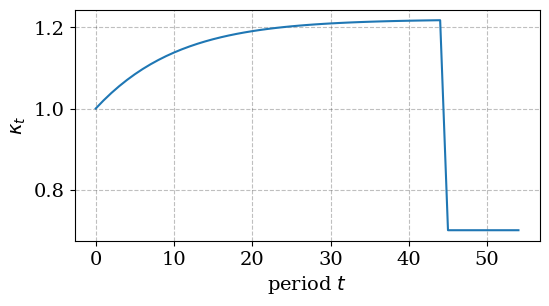

In [15]:
fig, ax = plt.subplots(1,1,figsize=(6,3))

ax.plot(model.par.kappa)

ax.set_xlabel('period $t$')
ax.set_ylabel('$\\kappa_t$')

filepath = f"{folder}/BufferStockModel_kappa.svg"
plt.savefig(filepath, bbox_inches='tight')

## 4. <a id='toc4_'></a>[Convergence](#toc0_)

D = 0, algoname = DeepSimulate


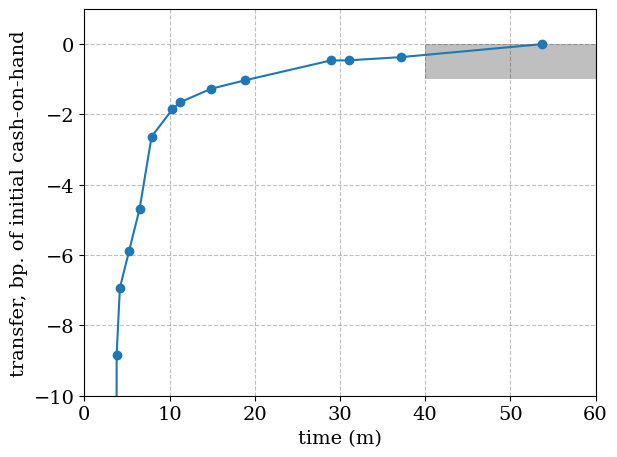

D = 0, algoname = DeepFOC


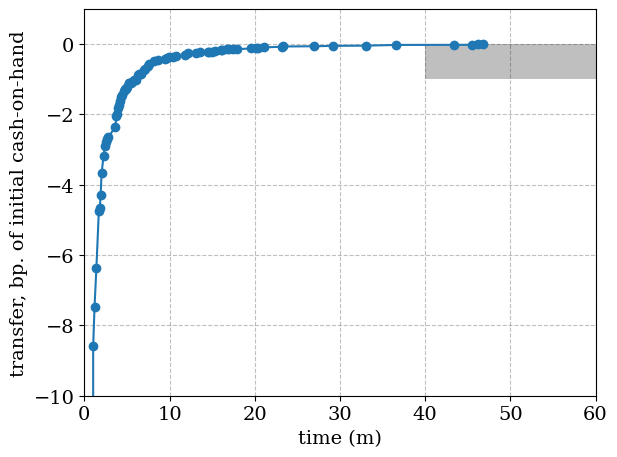

D = 0, algoname = DeepVPD


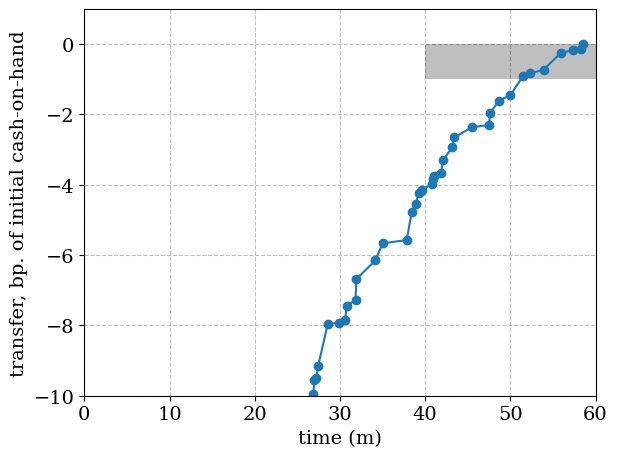

D = 0, algoname = DeepVPD_NNs3FOC


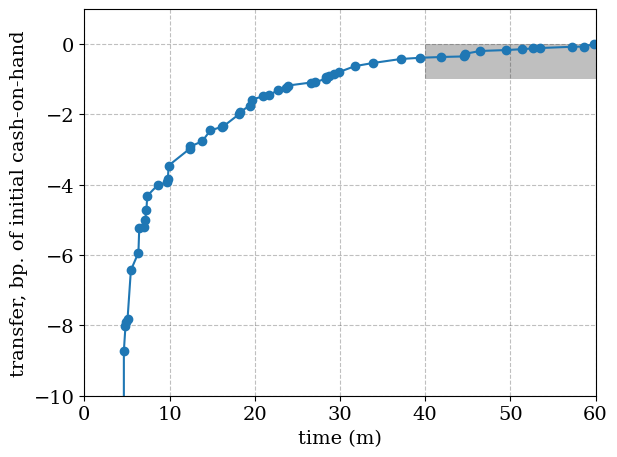

D = 3, algoname = DeepSimulate


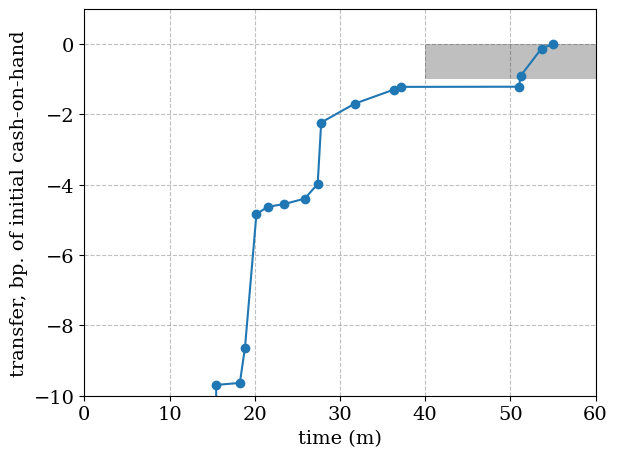

D = 3, algoname = DeepFOC


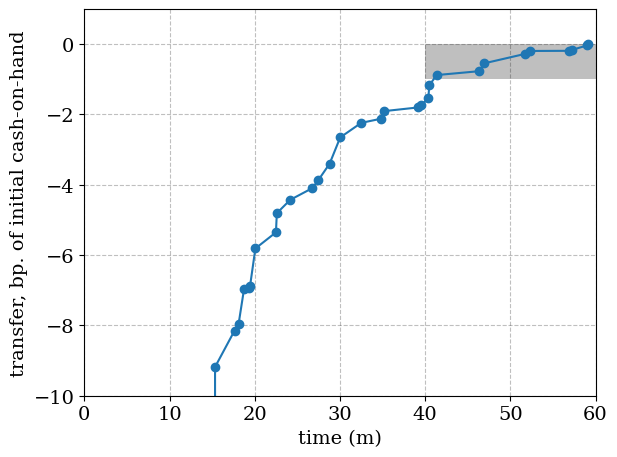

D = 3, algoname = DeepVPD


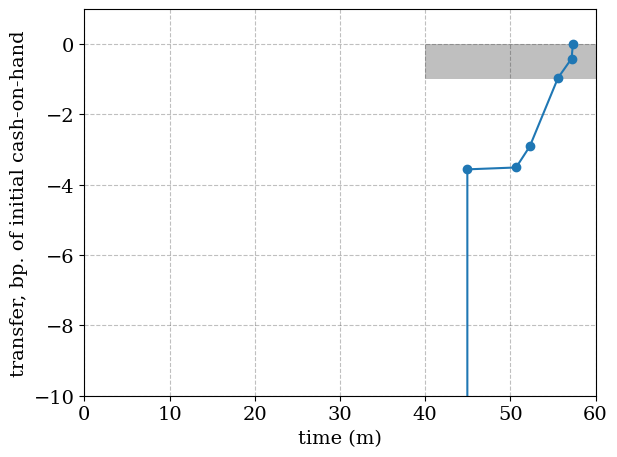

D = 3, algoname = DeepVPD_NNs3FOC


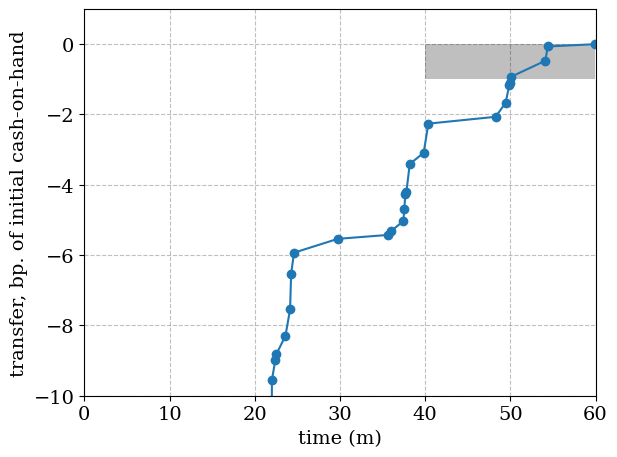

In [16]:
for D in Ds:
    for algoname in algonames + ['DeepVPD_NNs3FOC']:
        
        print(f'D = {D}, algoname = {algoname}')
        
        model = get_model(models,algoname,D)
        postfix = f'_BufferStockModel_{algoname}_{D}D'

        EconDLSolvers.convergence_plot(model,
                         y_fac=10_000,ylabel='transfer, bp. of initial cash-on-hand',
                         folder=folder,postfix=postfix,close_fig=False)
        
        plt.show()

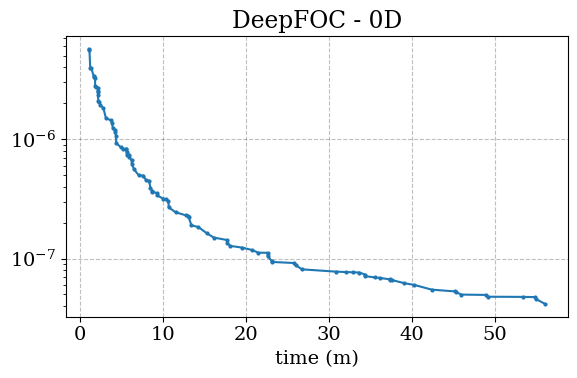

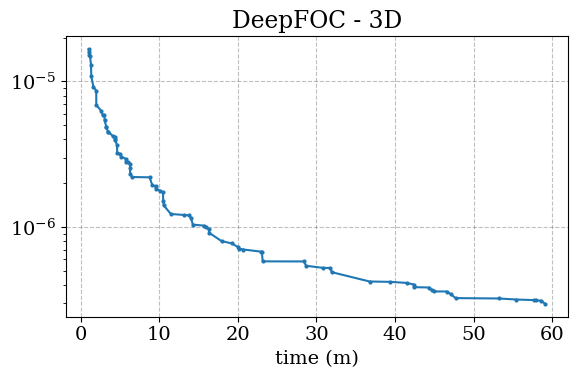

In [17]:
for D in [0,3]:
        
    model = models[('DeepFOC',f'{D}D')]
    k_max = model.info['iter']

    x = [model.info[('k_time',k)]/60 for k in range(k_max) if ('policy_loss',k) in model.info and model.info[('k_time',k)]/60 > 1]    
    y = [model.info[('policy_loss',k)] for k in range(k_max) if ('policy_loss',k) in model.info and model.info[('k_time',k)]/60 > 1]

    x_ = []
    y_ = []
    best_yi = np.inf
    for xi,yi in zip(x,y):
        if yi < best_yi:
            x_.append(xi)
            y_.append(yi)
            best_yi = yi

    fig, ax = plt.subplots(1,1,figsize=(6,4))
    ax.set_title(f'DeepFOC - {D}D')
    ax.plot(x_,y_,'-o',ms='2',color=colors[0])
    ax.set_xlabel('time (m)')
    ax.set_yscale('log')

    fig.tight_layout()
    fig.savefig(f'{folder}/BufferStockModel_DeepFOC_{D}D_policy_loss.svg')

    plt.show()


## 5. <a id='toc5_'></a>[Solution comparisons](#toc3_)                   [&#8593;](#toc0_)

### 5.1. <a id='toc5_1_'></a>[Policy function](#toc3_1_)                   [&#8593;](#toc0_)

In [18]:
do_display = True
D = 0
t = 5
i_ps = [20,25,30]
m_max = 7.0
c_max = 3.0

m_grid = models[('DP','0D')].egm.m_grid
p_grid = models[('DP','0D')].egm.p_grid

DeepSimulate


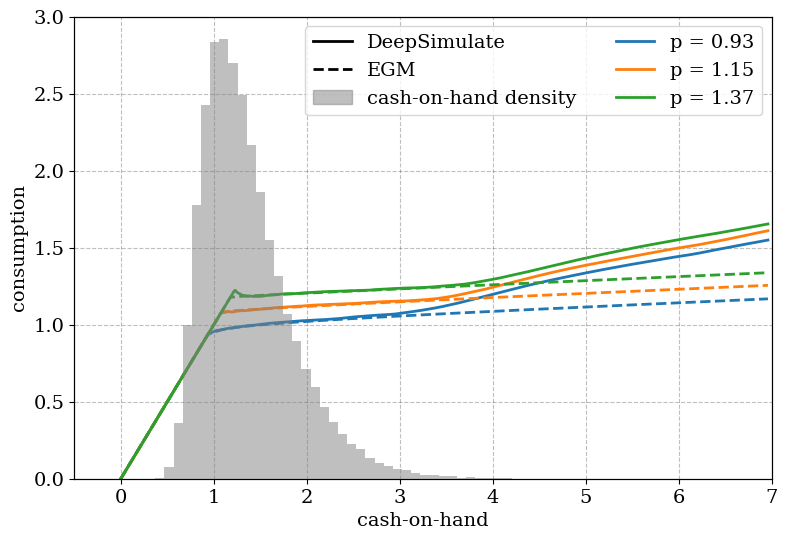

DeepFOC


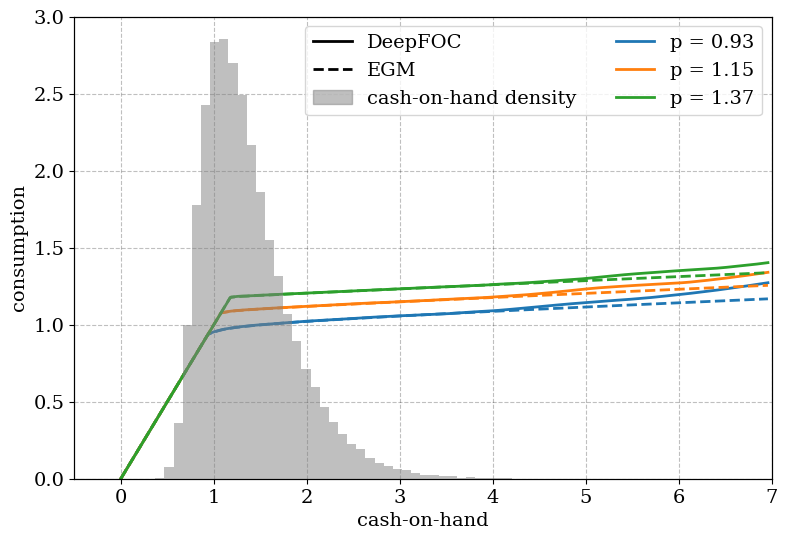

DeepVPD


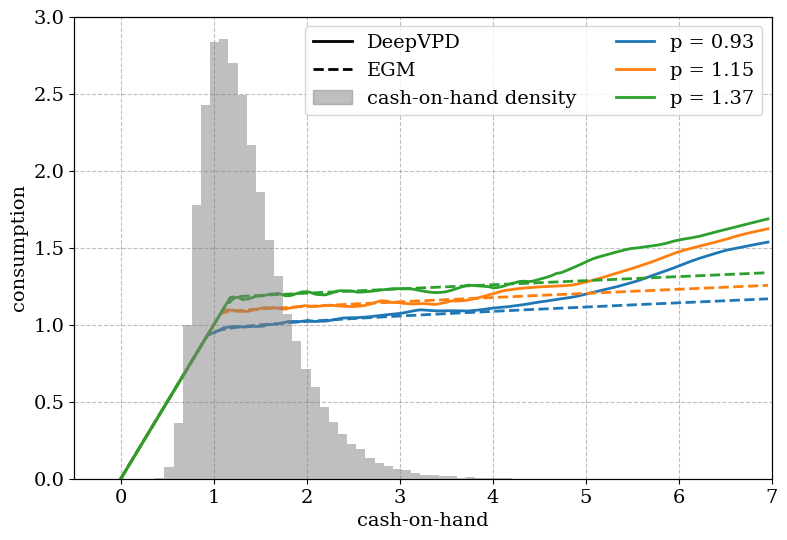

DeepVPD_FOC


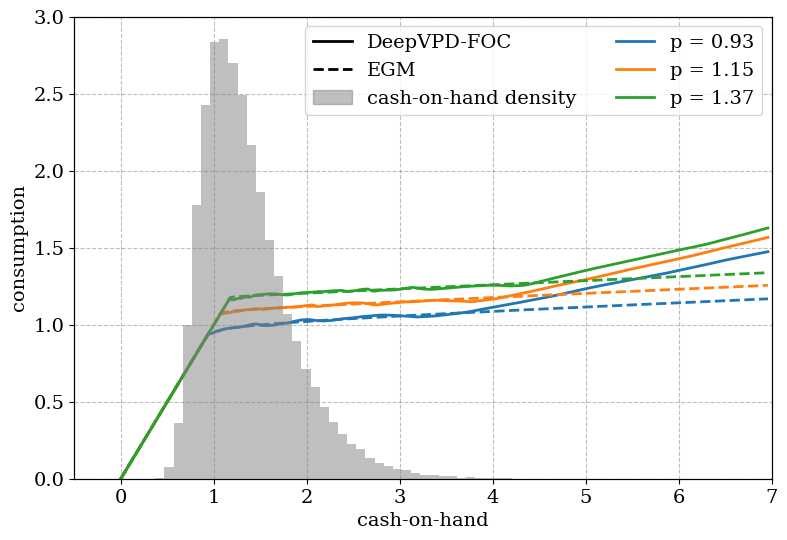

DeepVPD_NNs3


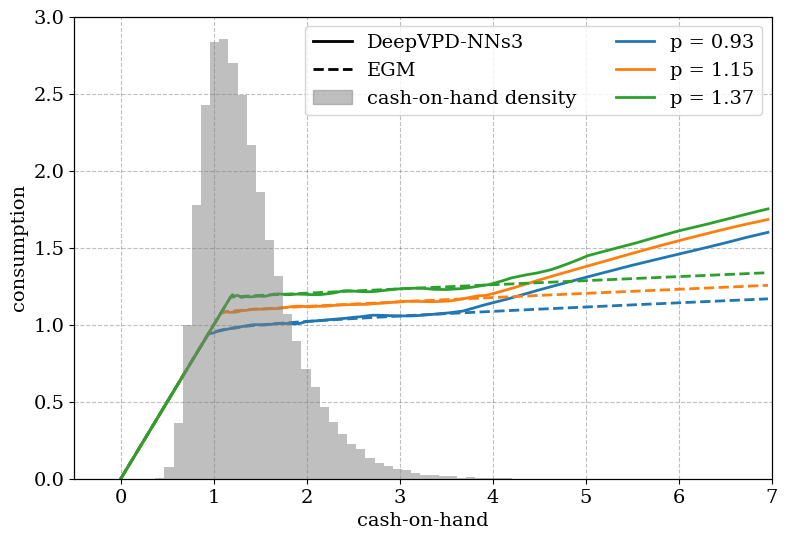

DeepVPD_NNs3FOC


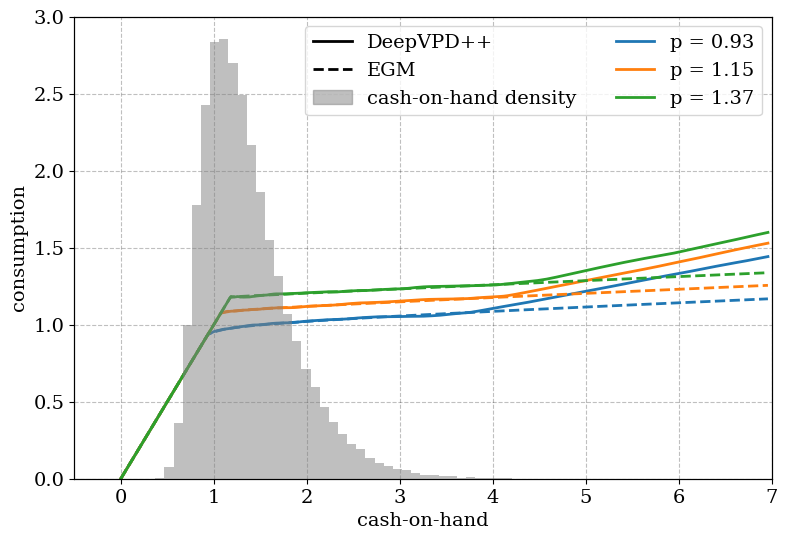

In [19]:
I = m_grid < m_max
if full:
    algonames_ = ['DeepSimulate','DeepFOC','DeepVPD','DeepVPD_FOC','DeepVPD_NNs3','DeepVPD_NNs3FOC']
else:
    algonames_ = ['DeepSimulate','DeepFOC','DeepVPD','DeepVPD_NNs3FOC']

for algoname in algonames_:
    
    print(algoname)
    label = algolabels[algoname]
    model = get_model(models,algoname,D)

    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)
    for i,i_p in enumerate(i_ps):

        ax.plot(m_grid[I],models[('DP','0D')].egm.sol_con[t,i_p,0,0,0,I],color=colors[i],ls='--',lw=2)
        ax.plot(m_grid[I],model.info['sol_con_grid'][t,i_p,0,0,0,I],color=colors[i],lw=2)            

    # add histogram
    cash_in_hand = models[('DP','0D')].sim.states[t,:,0]
    twin_ax = ax.twinx()
    twin_ax.hist(cash_in_hand,bins=50,alpha=0.5,color='grey',density=True)
    twin_ax.set_yticks([])
    twin_ax.grid(False)

    # misc
    ax.set_xlim(-0.5,m_max)
    ax.set_xlabel('cash-on-hand')
    ax.set_ylim(0,c_max)
    ax.set_ylabel('consumption')

    # legend
    legend_labels = [label] + ['EGM'] + ['cash-on-hand density'] + [f'p = {p_grid[i_p]:.2f}' for i_p in i_ps] 
    legend_handles = [mlines.Line2D([0], [0], color='black', lw=2, ls='-')]
    legend_handles += [mlines.Line2D([0], [0], color='black', ls='--', lw=2)]
    legend_handles += [matplotlib.patches.Rectangle((0,0),1,1,color='grey',alpha=0.5)] 
    legend_handles += [mlines.Line2D([0],[0],color=colors[i],ls='-',lw=2) for i in range(3)] 
    ax.legend(legend_handles,legend_labels,ncol=2,loc='upper right')

    filepath = f'{folder}/BufferStockModel_policy_0D_t{t}_{algoname}.svg'
    fig.savefig(filepath)

    if do_display: 
        plt.show()
    else:
        plt.close(fig)
        display(HTML(f'<a href="{filepath}">{filepath}</a>'))

### 5.2. <a id='toc5_2_'></a>[Exploration](#toc0_)

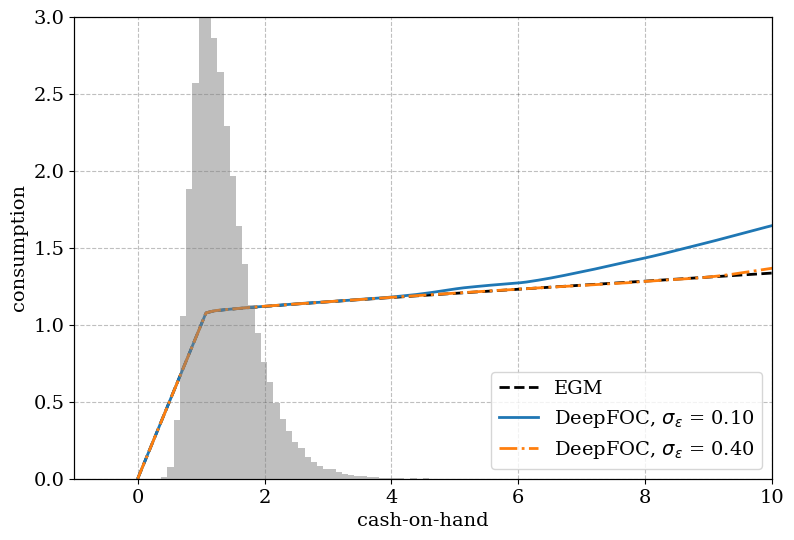

In [20]:
algoname = 'DeepFOC'
t = 5
i_p = 25
m_max = 10.0

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)

ax.plot(m_grid,models[('DP','0D')].egm.sol_con[t,i_p,0,0,0,:],ls='--',lw=2,color='black',label='EGM')

epsilon_sigma = models[(algoname,'0D')].train.epsilon_sigma[0] 
ax.plot(m_grid,models[(algoname,'0D')].info['sol_con_grid'][t,i_p,0,0,0,:],ls='-',lw=2,label=f'{algoname}, $\\sigma_{{\\epsilon}}$ = {epsilon_sigma:.2f}')  

model_ = models[(algoname,'0D',f'moreexplore')]
epsilon_sigma = model_.train.epsilon_sigma[0]
ax.plot(m_grid,model_.info['sol_con_grid'][t,i_p,0,0,0,:],lw=2,ls='-.',label=f'DeepFOC, $\\sigma_{{\\epsilon}}$ = {epsilon_sigma:.2f}')  

# add histogram
cash_on_hand = models[('DP','0D')].sim.states[t,:,0]
twin_ax = ax.twinx()
twin_ax.hist(cash_on_hand,bins=50,alpha=0.5,color='grey',density=True,label='cash-on-hand (right axis)')
twin_ax.set_ylim(0,1.0)
twin_ax.set_yticks([])
twin_ax.grid(False)

# misc
ax.set_xlim(-1,m_max)
ax.set_xlabel('cash-on-hand')
ax.set_ylim(0,c_max)
ax.set_ylabel('consumption')

ax.legend(frameon=True,ncol=1,loc='lower right')

filepath = f'{folder}/BufferStockModel_policy_0D_t{t}_{algoname}_moreexplore.svg'   
fig.savefig(filepath)

if do_display: 
    plt.show()
else:
    plt.close(fig)
    display(HTML(f'<a href="{filepath}">{filepath}</a>'))

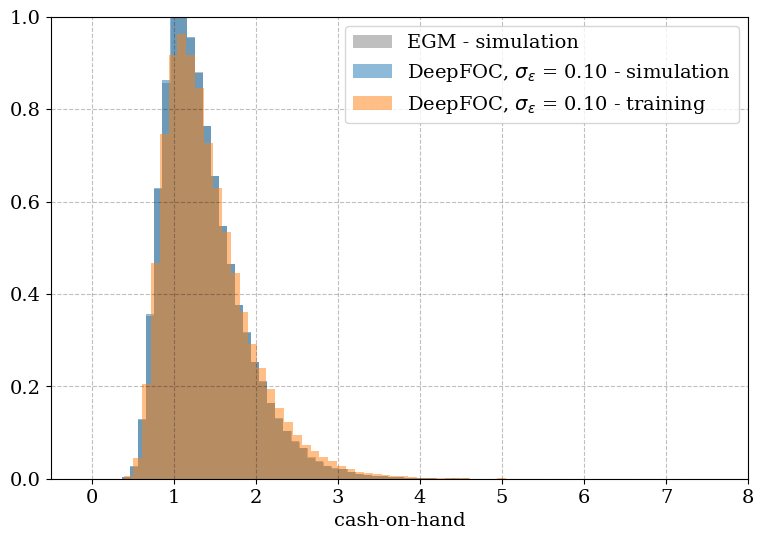

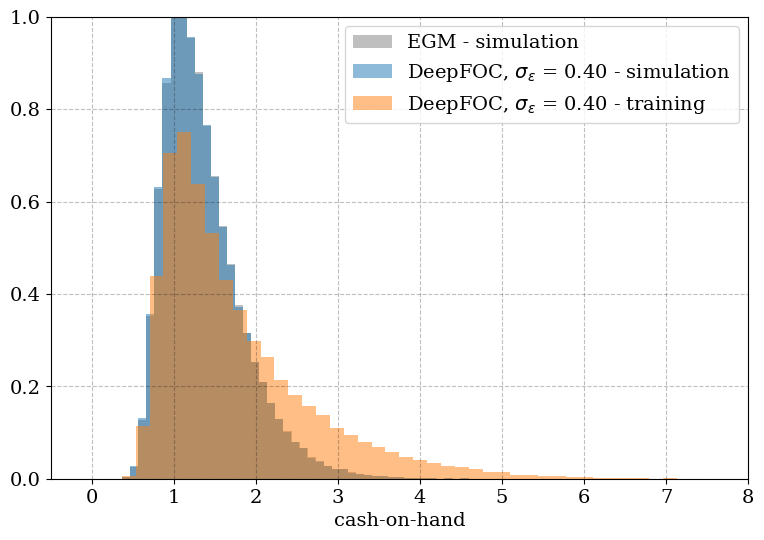

In [21]:
t = 5
for key in [(algoname,'0D'),(algoname,'0D','moreexplore')]:
    
    model = models[key]
    postfix = f'_{key[2]}' if len(key) == 3 else ''
    
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(1,1,1)

    # EGM
    ax.hist(models[('DP','0D')].sim.states[t,:,0],bins=50,alpha=0.5,color='grey',density=True,label='EGM - simulation')

    # DL
    epsilon_sigma = model.train.epsilon_sigma[0] 
    ax.hist(model.sim.states[t,:,0],bins=50,alpha=0.5,density=True,label=f'{algoname}, $\\sigma_{{\\epsilon}}$ = {epsilon_sigma:.2f} - simulation')
    ax.hist(model.sim_eps.states[t,:,0],bins=50,alpha=0.5,density=True,label=f'{algoname}, $\\sigma_{{\\epsilon}}$ = {epsilon_sigma:.2f} - training')

    # misc
    ax.set_xlim(-0.5,8)
    ax.set_xlabel('cash-on-hand')
    ax.set_ylim(0,1.0)

    ax.legend(frameon=True,loc='upper right')

    filepath = f'{folder}/BufferStockModel_policy_0D_t{t}_{algoname}_hist{postfix}.svg'
    fig.savefig(filepath)

    if do_display: 
        plt.show()
    else:
        plt.close(fig)
        display(HTML(f'<a href="{filepath}">{filepath}</a>'))

### 5.3. <a id='toc5_3_'></a>[Life cycle profiles](#toc3_2_)                   [&#8593;](#toc0_)

#### 5.3.1. <a id='toc5_3_1_'></a>[Cash-on-hand](#toc0_)

DeepSimulate 0


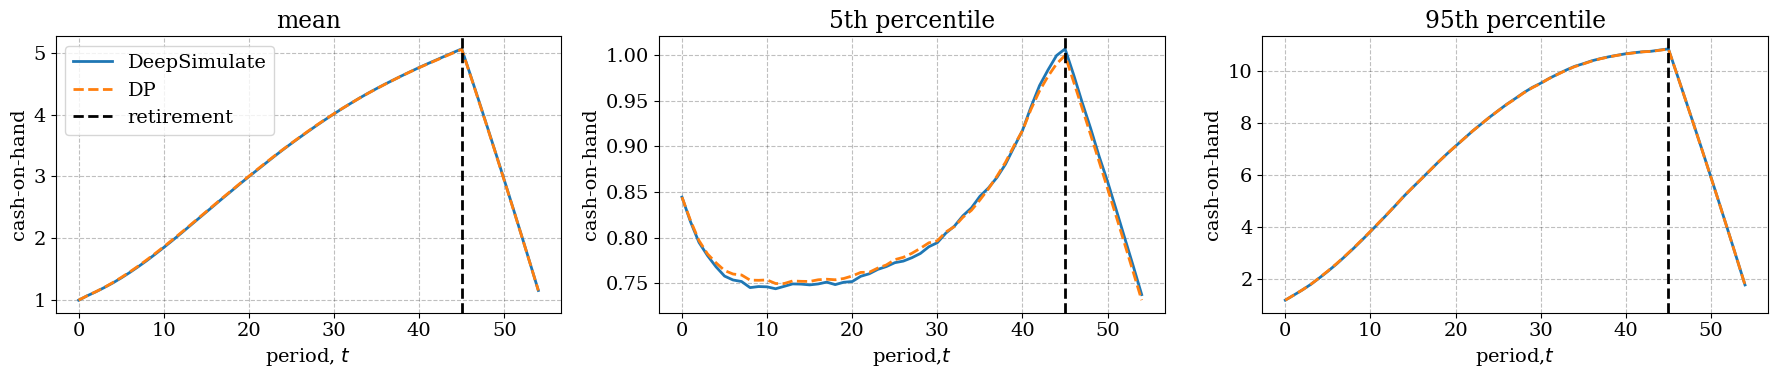

DeepFOC 0


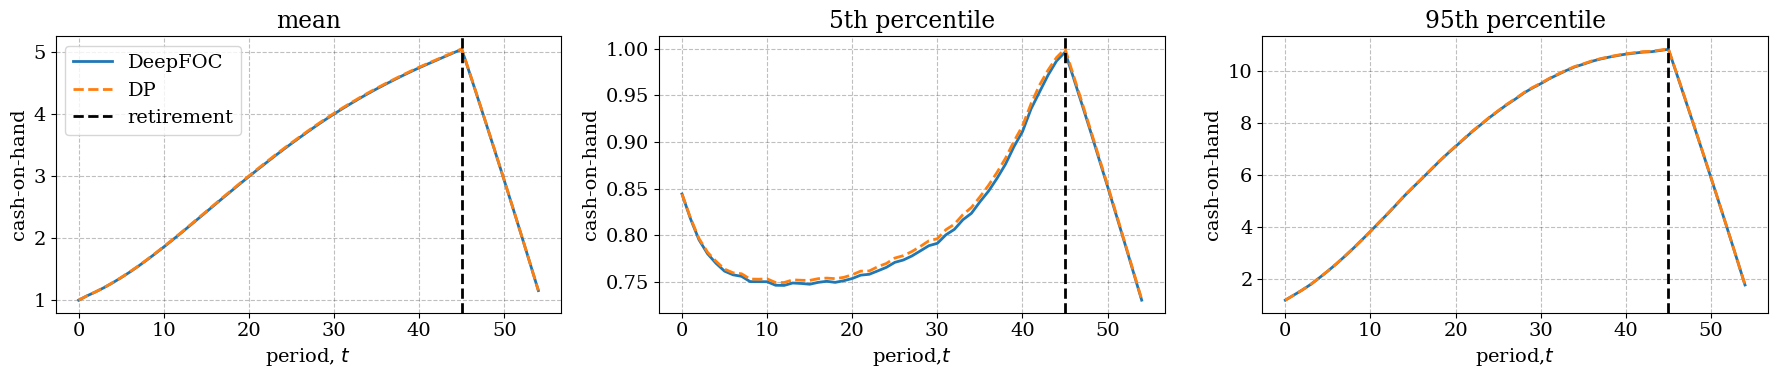

DeepVPD 0


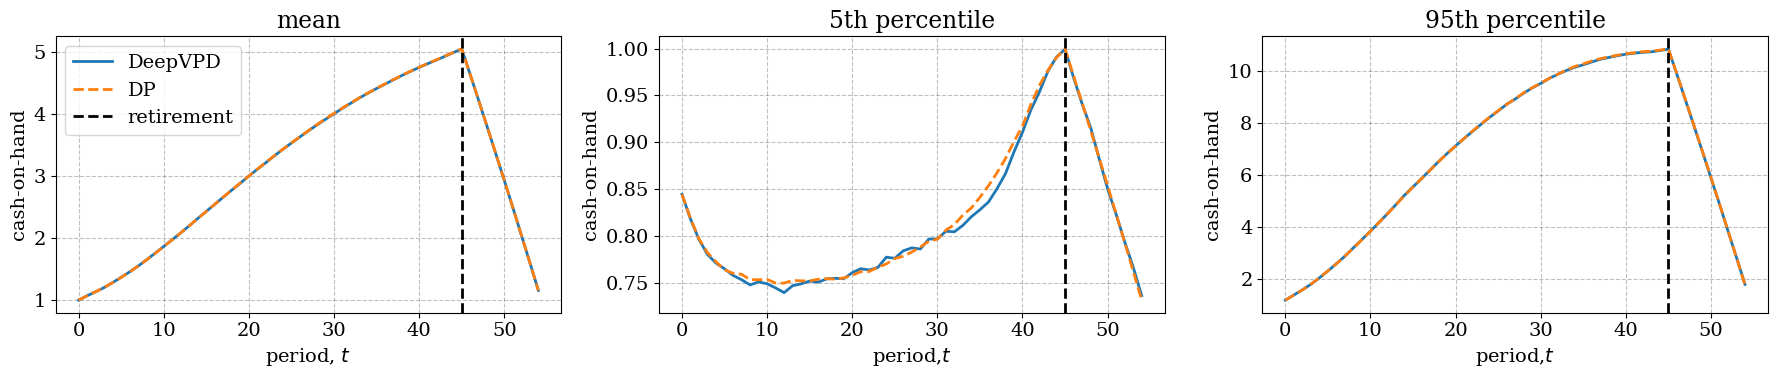

DeepVPD_NNs3FOC 0


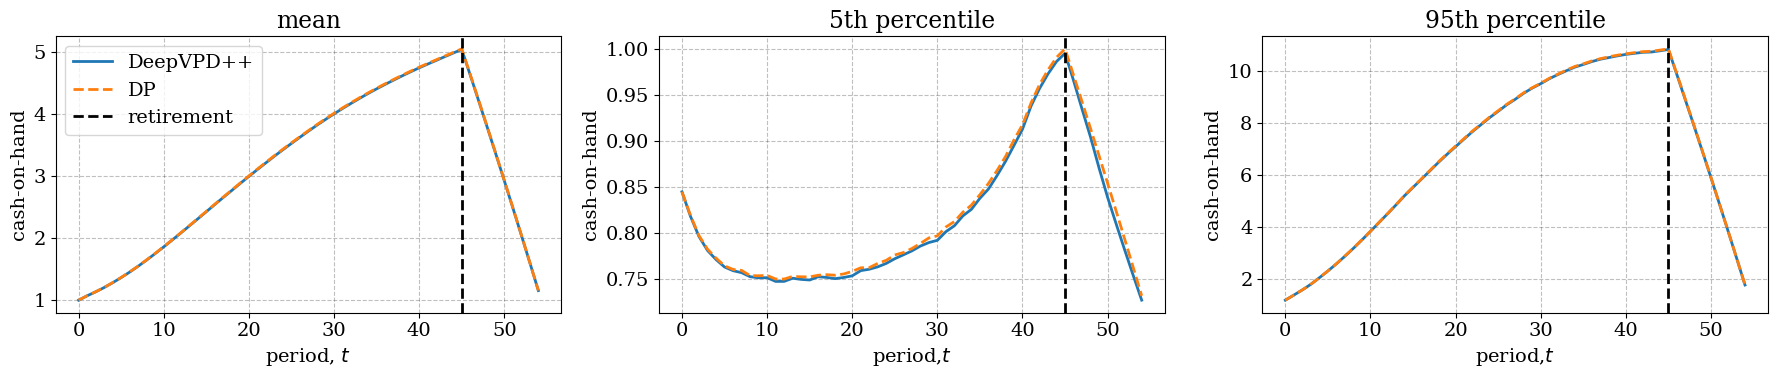

DeepSimulate 3


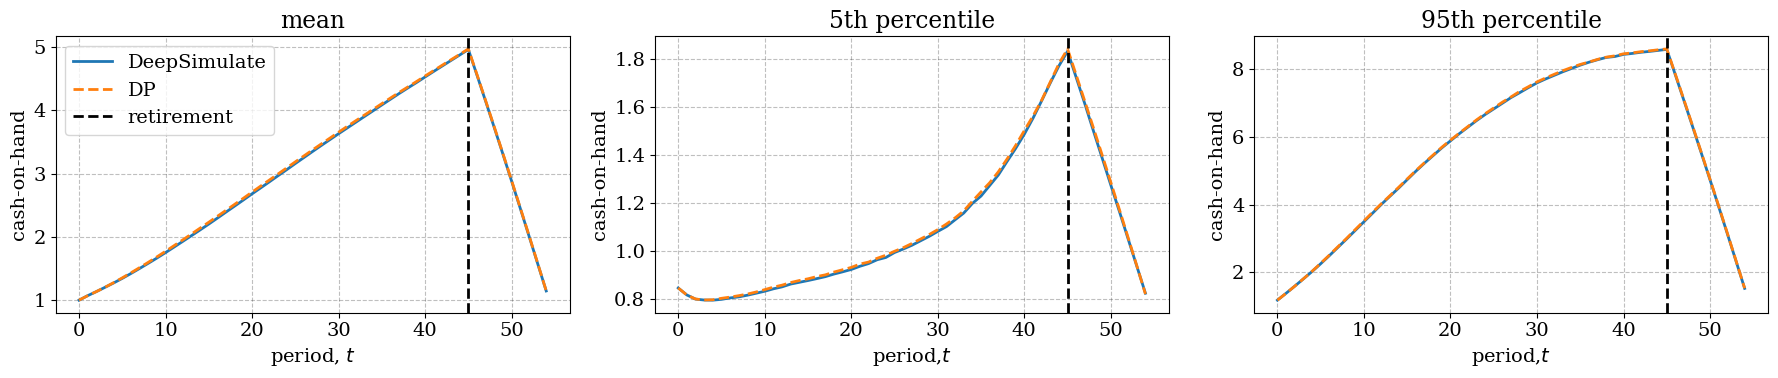

DeepFOC 3


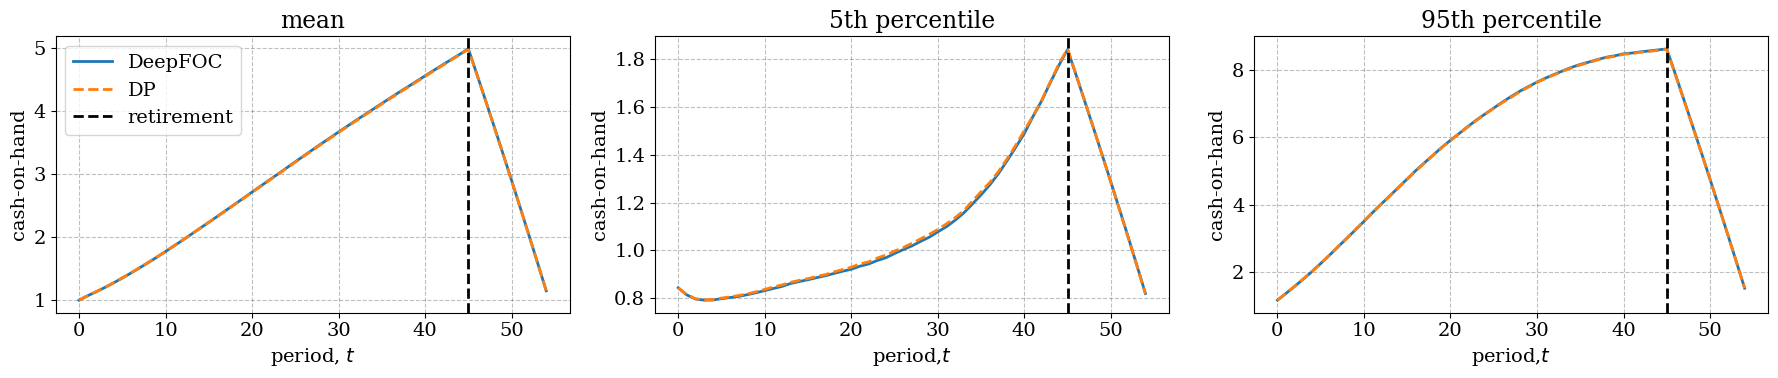

DeepVPD 3


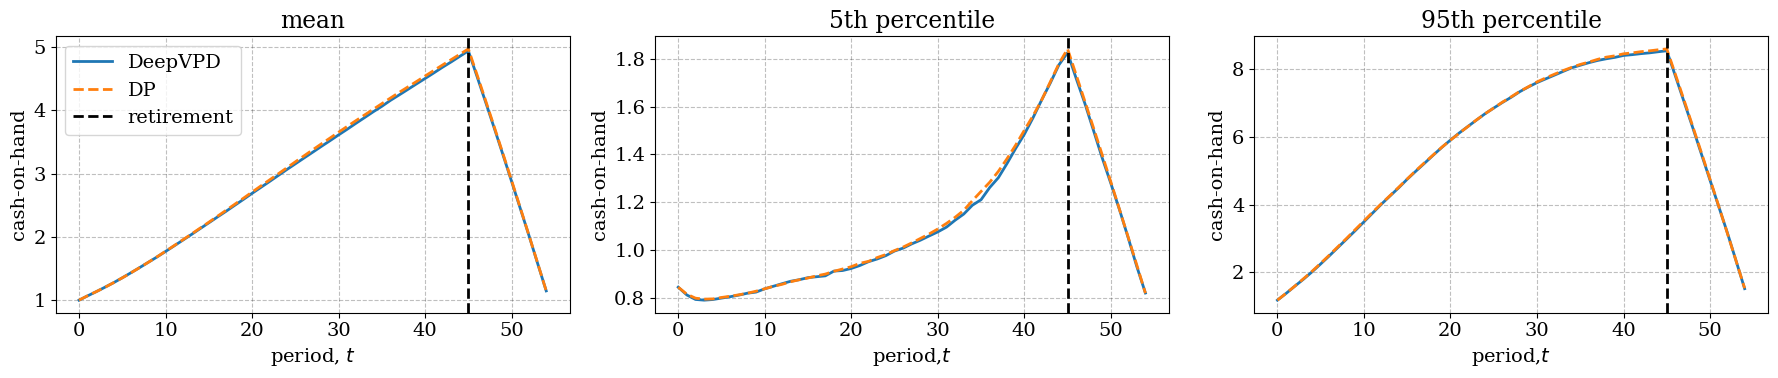

DeepVPD_NNs3FOC 3


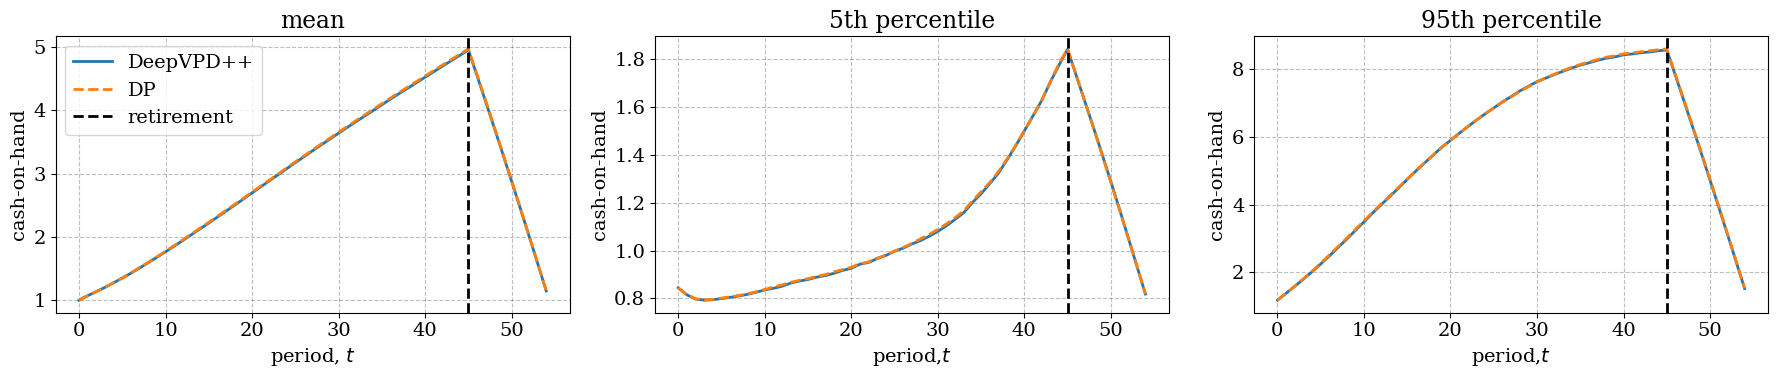

In [22]:
# plot wide format
for D in Ds:
    for algoname in algonames + ['DeepVPD_NNs3FOC']:

        model = get_model(models,algoname,D)
        if model is None: continue
        label = algolabels[algoname]

        print(algoname,D)

        fig = plt.figure(figsize=(18,4))

        ax = fig.add_subplot(1,3,1)
        ax.plot(np.mean(model.sim.states[:,:,0],axis=1),label=label,color=colors[0],linewidth=2)
        ax.plot(np.mean(models[('DP',f'{D}D')].sim.states[:,:,0],axis=1),label='DP',color=colors[1],linewidth=2,ls='--')
        ax.set_title('mean')
        ax.set_xlabel('period, $t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.legend()
        ax.set_ylabel('cash-on-hand')

        ax = fig.add_subplot(1,3,2)
        ax.plot(np.percentile(model.sim.states[:,:,0],q=5,axis=1),color=colors[0],linewidth=2)
        ax.plot(np.percentile(models[('DP',f'{D}D')].sim.states[:,:,0],q=5,axis=1),color=colors[1],linewidth=2,ls='--')
        ax.set_title('5th percentile')
        ax.set_xlabel('period,$t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.set_ylabel('cash-on-hand')

        ax = fig.add_subplot(1,3,3)
        ax.plot(np.percentile(model.sim.states[:,:,0],q=95,axis=1),color=colors[0],linewidth=2)
        ax.plot(np.percentile(models[('DP',f'{D}D')].sim.states[:,:,0],q=95,axis=1),color=colors[1],linewidth=2,ls='--')
        ax.set_title('95th percentile')
        ax.set_xlabel('period,$t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.set_ylabel('cash-on-hand')        

        fig.tight_layout()

        filepath = f'{folder}/BufferStockModel_lcp_m_{D}D_{algoname}_wide.svg'
        fig.savefig(filepath)

        if do_display: 
            plt.show()
        else:
            plt.close(fig)
            display(HTML(f'<a href="{filepath}">{filepath}</a>'))

In [23]:
# plot long format
for D in Ds:
    for algoname in algonames + ['DeepVPD_NNs3FOC']:

        model = get_model(models,algoname,D)
        if model is None: continue
        label = algolabels[algoname]
        print(algoname,D)

        fig = plt.figure(figsize=(18,15))

        ax = fig.add_subplot(3,1,1)
        ax.plot(np.mean(model.sim.states[:,:,0],axis=1),label=label,color=colors[0],linewidth=2)
        ax.plot(np.mean(models[('DP',f'{D}D')].sim.states[:,:,0],axis=1),label='DP',color=colors[1],linewidth=2,ls='--')
        ax.set_title('mean')
        ax.set_xlabel('period, $t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.legend()
        ax.set_ylabel('cash-on-hand')

        ax = fig.add_subplot(3,1,2)
        ax.plot(np.percentile(model.sim.states[:,:,0],q=5,axis=1),color=colors[0],linewidth=2)
        ax.plot(np.percentile(models[('DP',f'{D}D')].sim.states[:,:,0],q=5,axis=1),color=colors[1],linewidth=2,ls='--')
        ax.set_title('5th percentile')
        ax.set_xlabel('period,$t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.set_ylabel('cash-on-hand')

        ax = fig.add_subplot(3,1,3)
        ax.plot(np.percentile(model.sim.states[:,:,0],q=95,axis=1),color=colors[0],linewidth=2)
        ax.plot(np.percentile(models[('DP',f'{D}D')].sim.states[:,:,0],q=95,axis=1),color=colors[1],linewidth=2,ls='--')
        ax.set_title('95th percentile')
        ax.set_xlabel('period,$t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.set_ylabel('cash-on-hand')        

        fig.tight_layout()

        filepath = f'{folder}/BufferStockModel_lcp_m_{D}D_{algoname}_long.svg'
        fig.savefig(filepath)

        plt.close(fig)
        display(HTML(f'<a href="{filepath}">{filepath}</a>'))

DeepSimulate 0


DeepFOC 0


DeepVPD 0


DeepVPD_NNs3FOC 0


DeepSimulate 3


DeepFOC 3


DeepVPD 3


DeepVPD_NNs3FOC 3


#### 5.3.2. <a id='toc5_3_2_'></a>[MPCs](#toc0_)

DeepSimulate 0


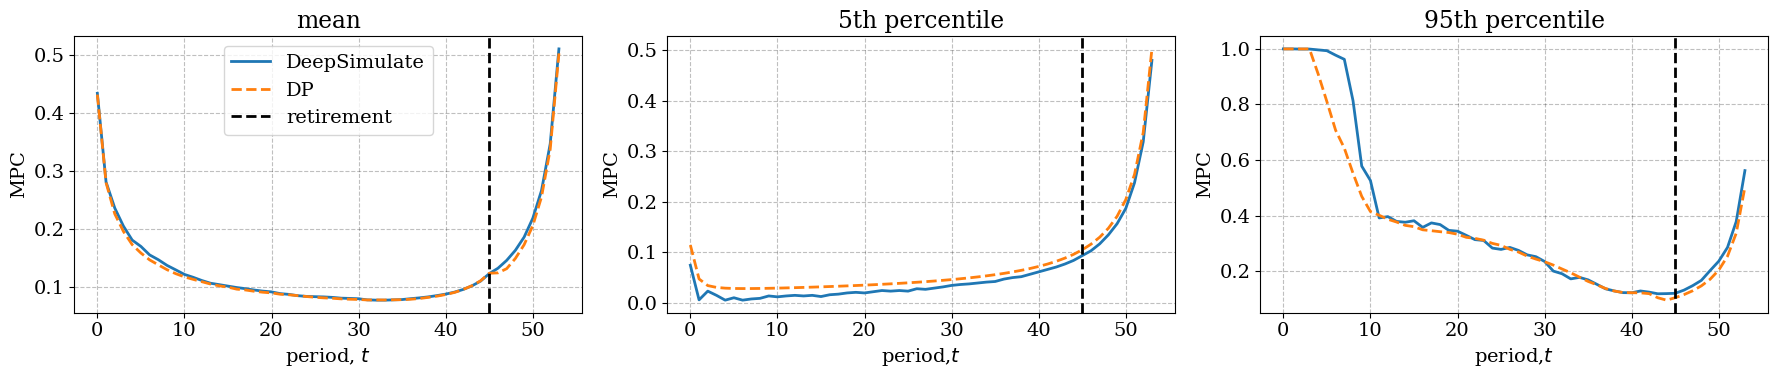

DeepFOC 0


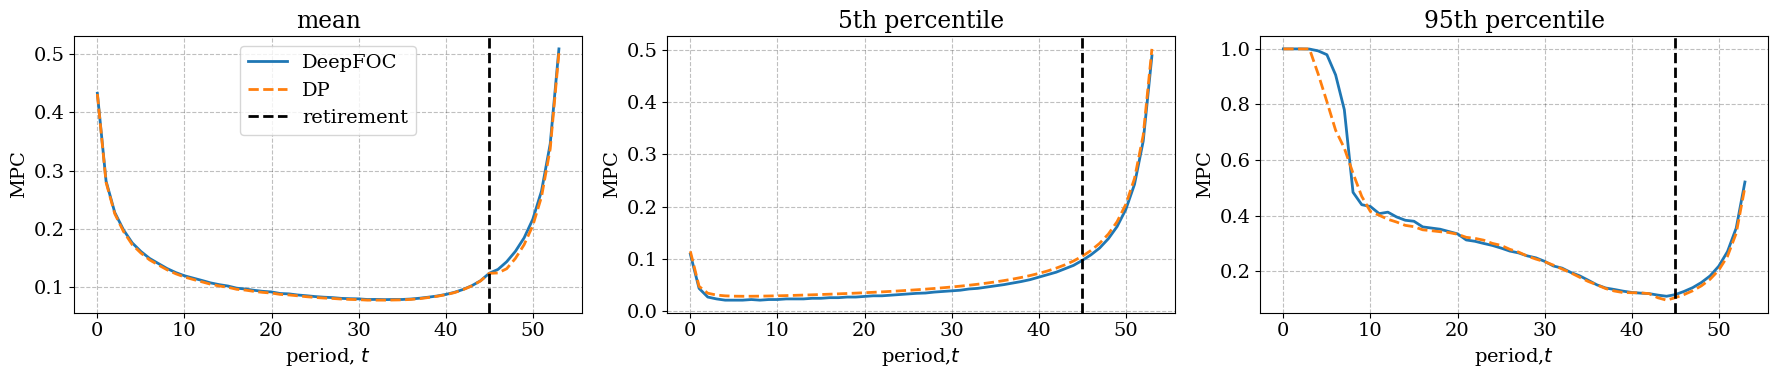

DeepVPD 0


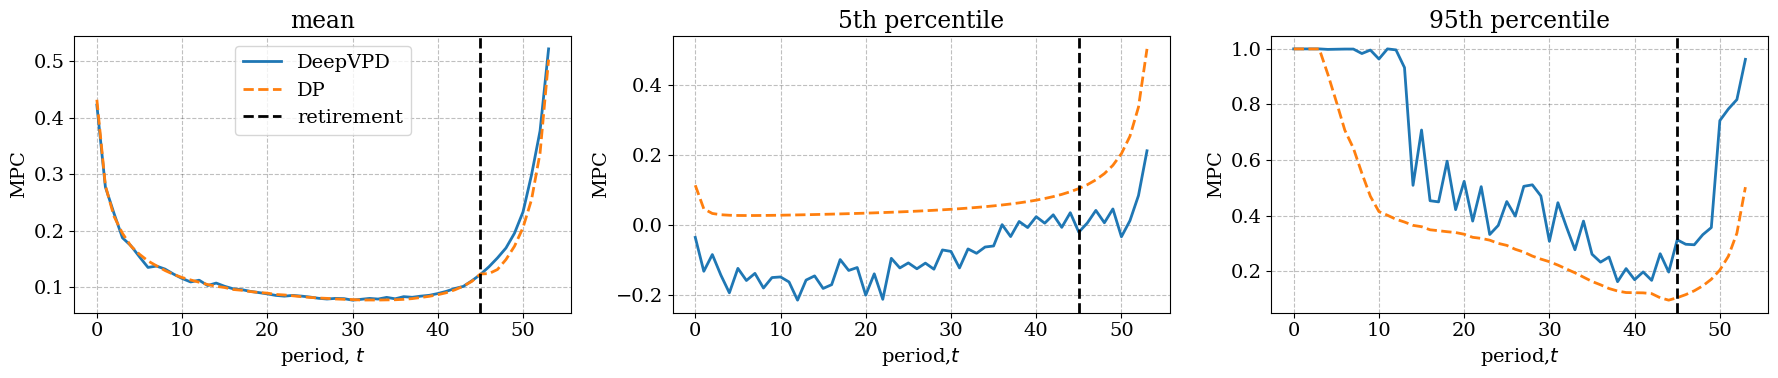

DeepVPD_NNs3FOC 0


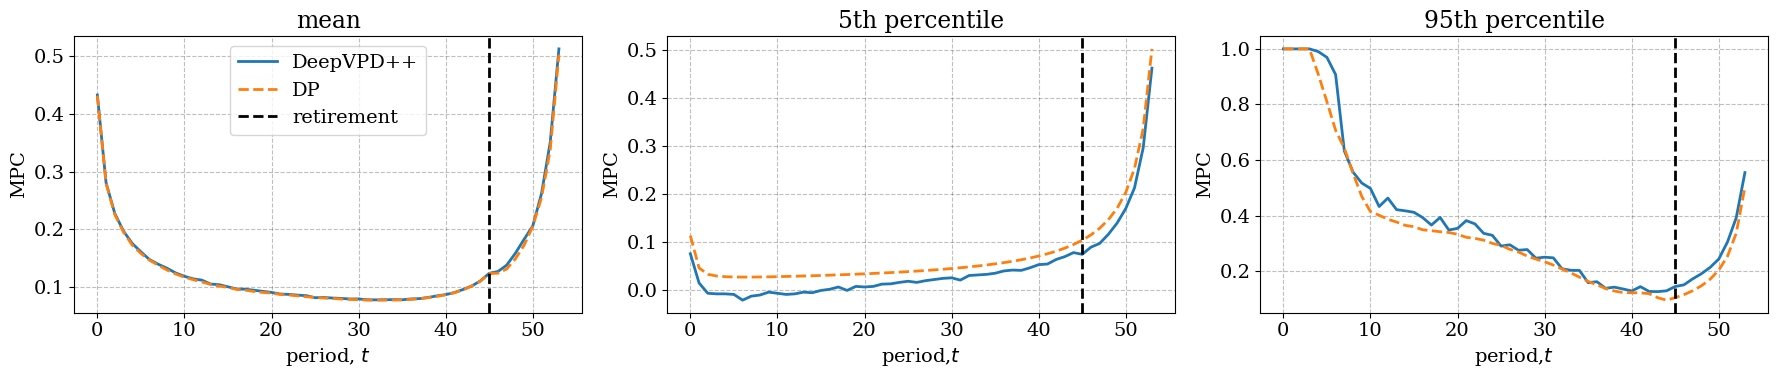

DeepSimulate 3


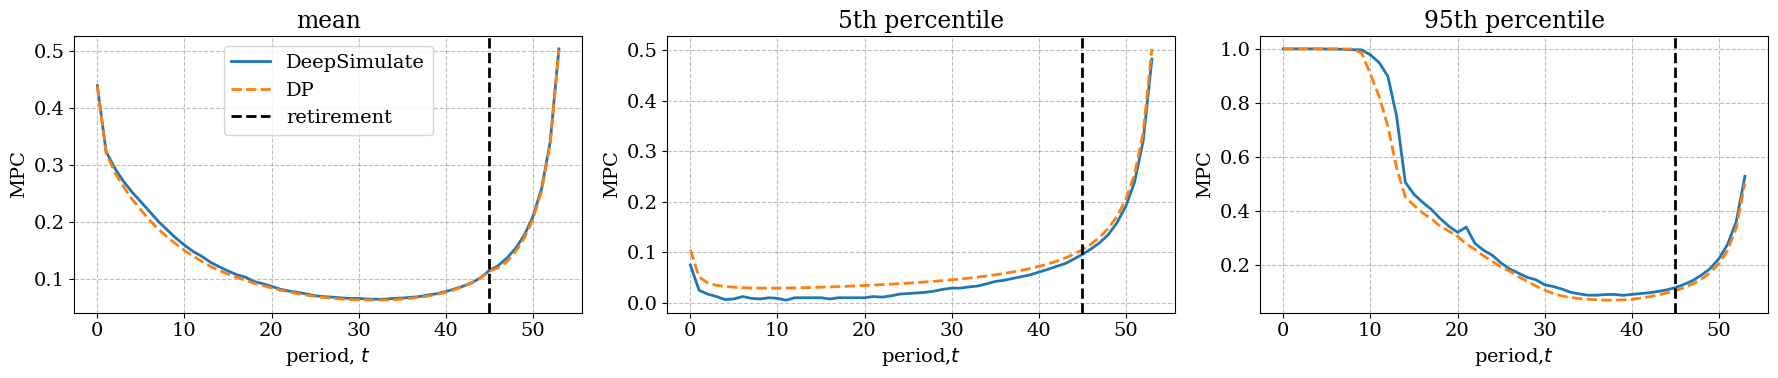

DeepFOC 3


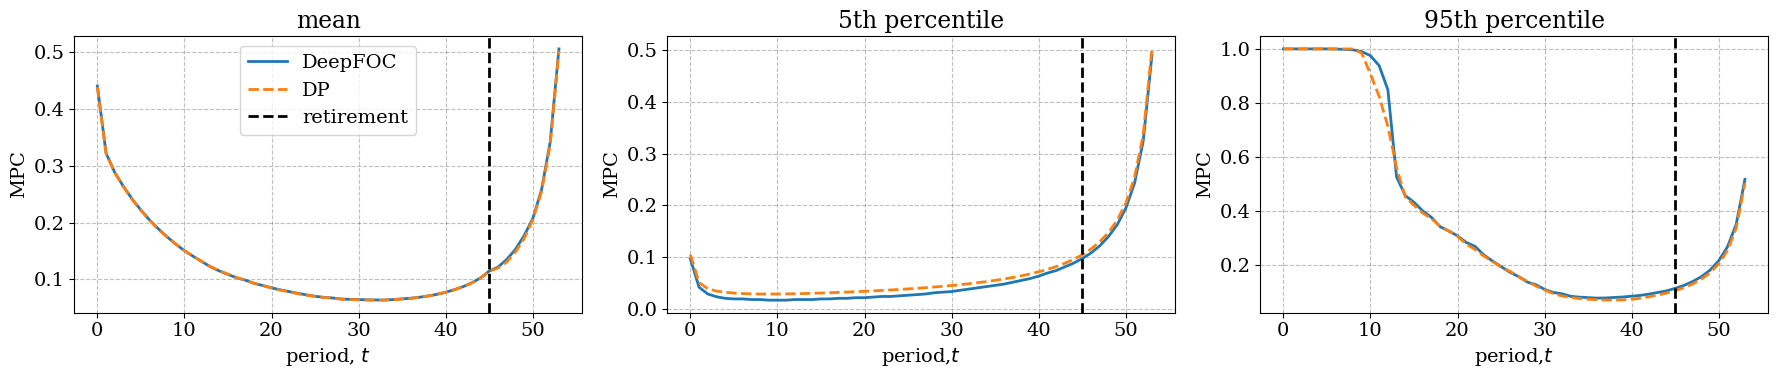

DeepVPD 3


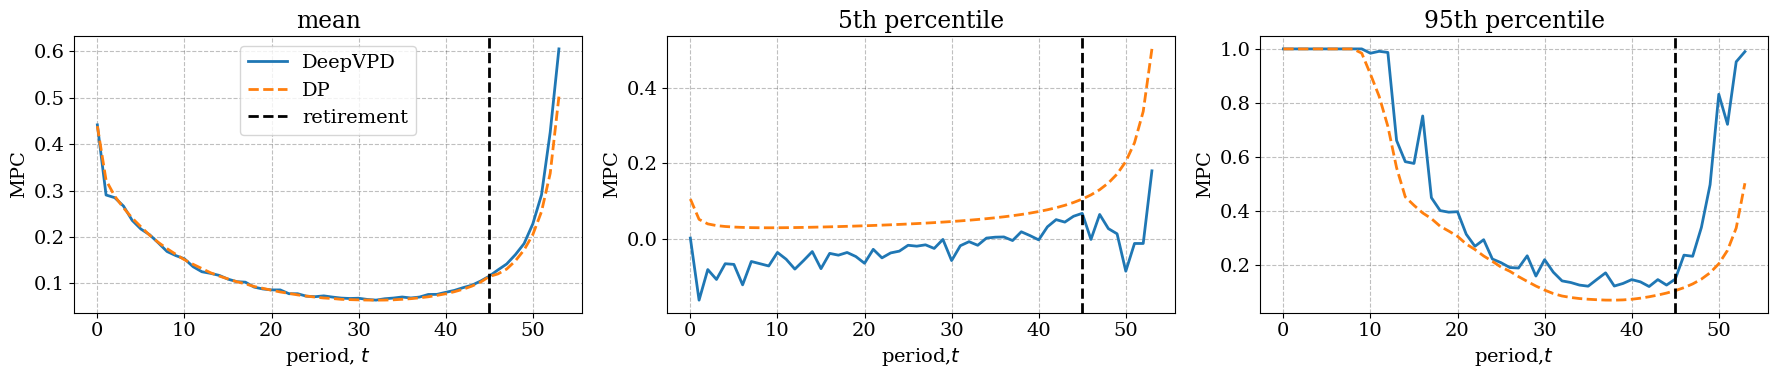

DeepVPD_NNs3FOC 3


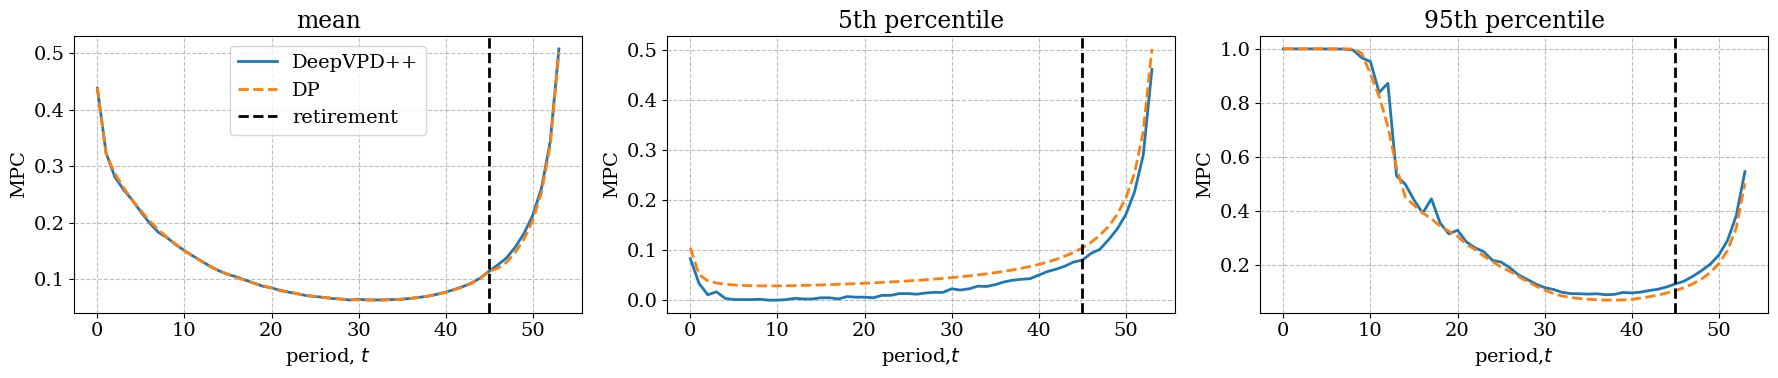

In [24]:
for D in Ds:
    for algoname in algonames + ['DeepVPD_NNs3FOC']:

        model = get_model(models,algoname,D)
        if model is None: continue
        label = algolabels[algoname]
        print(algoname,D)

        fig = plt.figure(figsize=(18,4))

        ax = fig.add_subplot(1,3,1)
        ax.plot(np.mean(model.sim.MPC[:-1,:],axis=1),label=label,color=colors[0],linewidth=2)
        ax.plot(np.mean(models[('DP',f'{D}D')].sim.MPC[:-1,:],axis=1),label='DP',color=colors[1],linewidth=2,ls='--')
        ax.set_title('mean')
        ax.set_xlabel('period, $t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.legend()
        ax.set_ylabel('MPC')

        ax = fig.add_subplot(1,3,2)
        ax.plot(np.percentile(model.sim.MPC[:-1,:],q=5,axis=1),color=colors[0],linewidth=2)
        ax.plot(np.percentile(models[('DP',f'{D}D')].sim.MPC[:-1,:],q=5,axis=1),color=colors[1],linewidth=2,ls='--')
        ax.set_title('5th percentile')
        ax.set_xlabel('period,$t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.set_ylabel('MPC')

        ax = fig.add_subplot(1,3,3)
        ax.plot(np.percentile(model.sim.MPC[:-1,:],q=95,axis=1),color=colors[0],linewidth=2)
        ax.plot(np.percentile(models[('DP',f'{D}D')].sim.MPC[:-1,:],q=95,axis=1),color=colors[1],linewidth=2,ls='--')
        ax.set_title('95th percentile')
        ax.set_xlabel('period,$t$')
        ax.axvline(x=model.par.T_retired,linewidth=2, label='retirement',color='black',linestyle='--')
        ax.set_ylabel('MPC')        

        fig.tight_layout()

        filepath = f'{folder}/BufferStockModel_lcp_MPC_{D}D_{algoname}.svg'
        fig.savefig(filepath)

        if do_display: 
            plt.show()
        else:
            plt.close(fig)
            display(HTML(f'<a href="{filepath}">{filepath}</a>'))

### 5.4. <a id='toc5_4_'></a>[CDFs of cash-on-hand](#toc3_3_)                   [&#8593;](#toc0_)

In [25]:
def CDF(x):

    # sort data
    x = np.sort(x)
    
    # create y data
    y = np.arange(1, len(x)+1) / len(x)

    return x, y

DeepSimulate 0


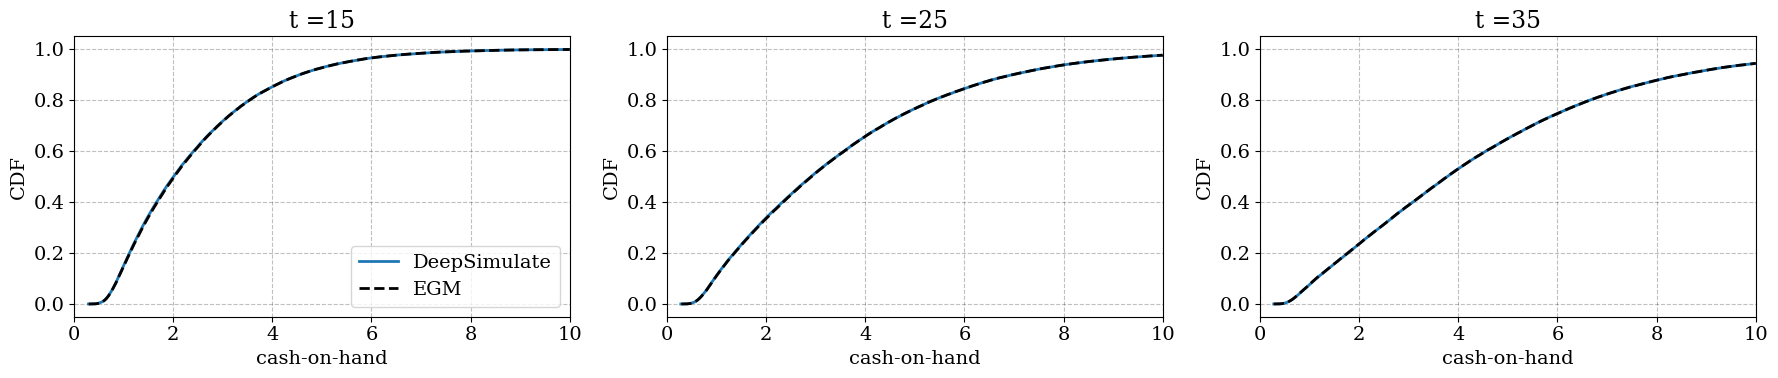

DeepFOC 0


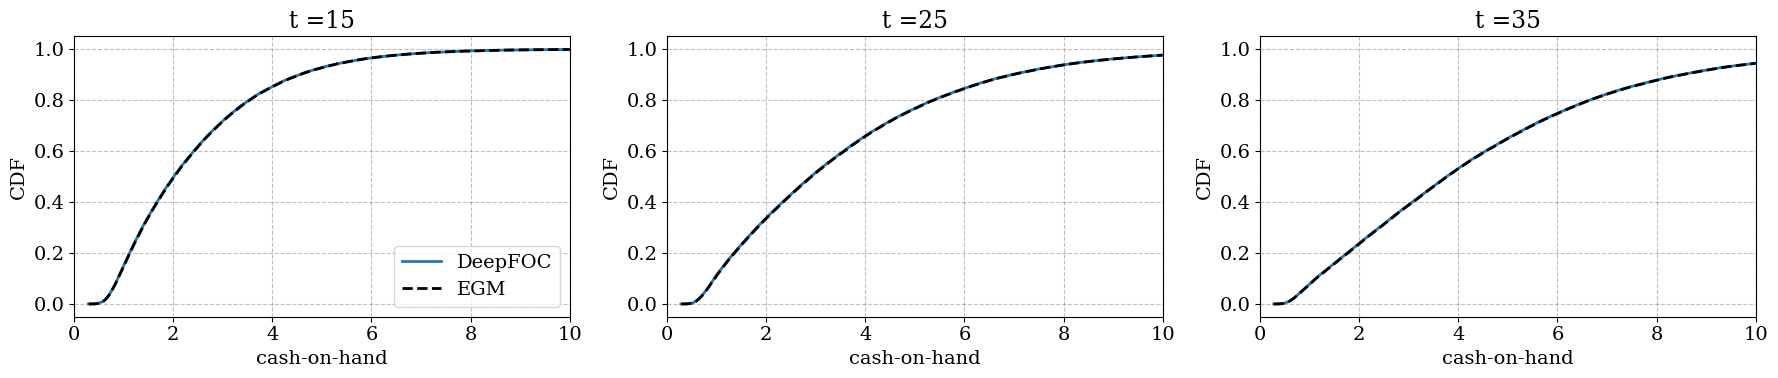

DeepVPD 0


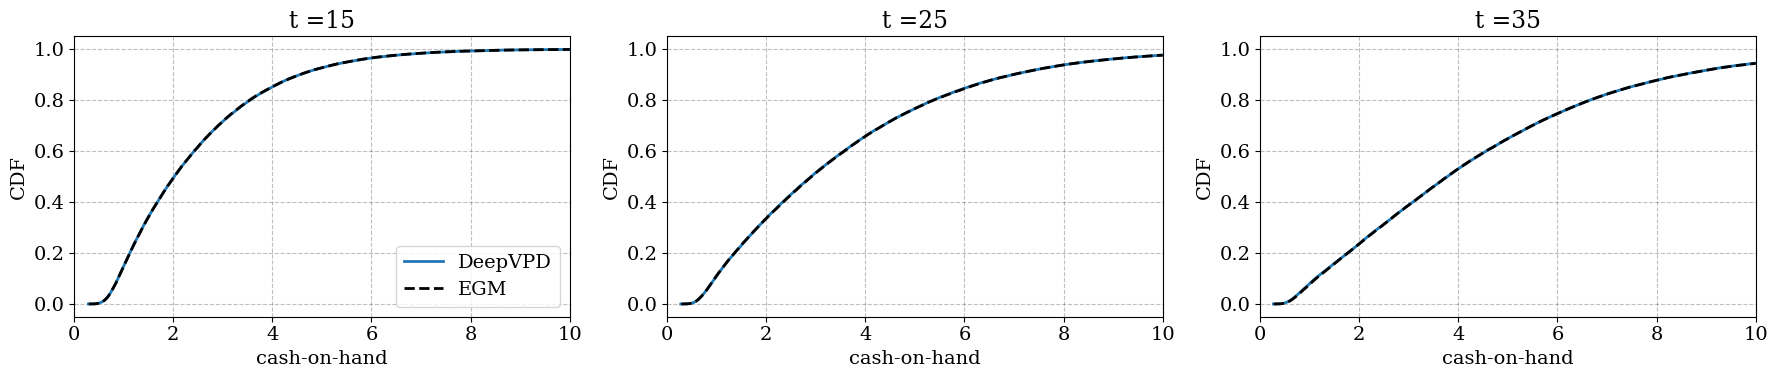

DeepVPD_NNs3FOC 0


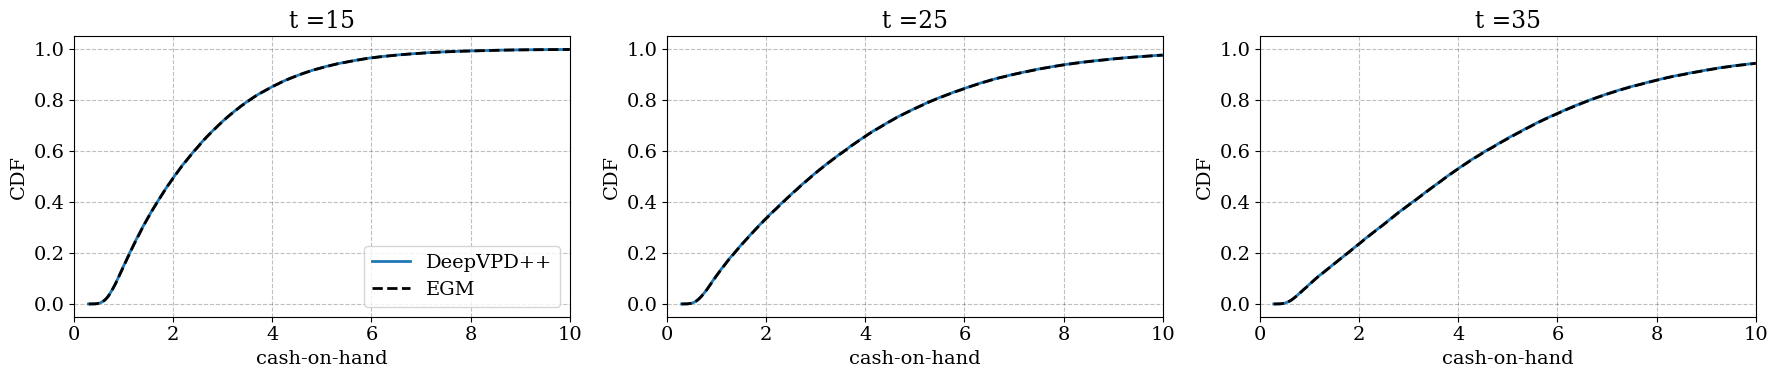

DeepSimulate 3


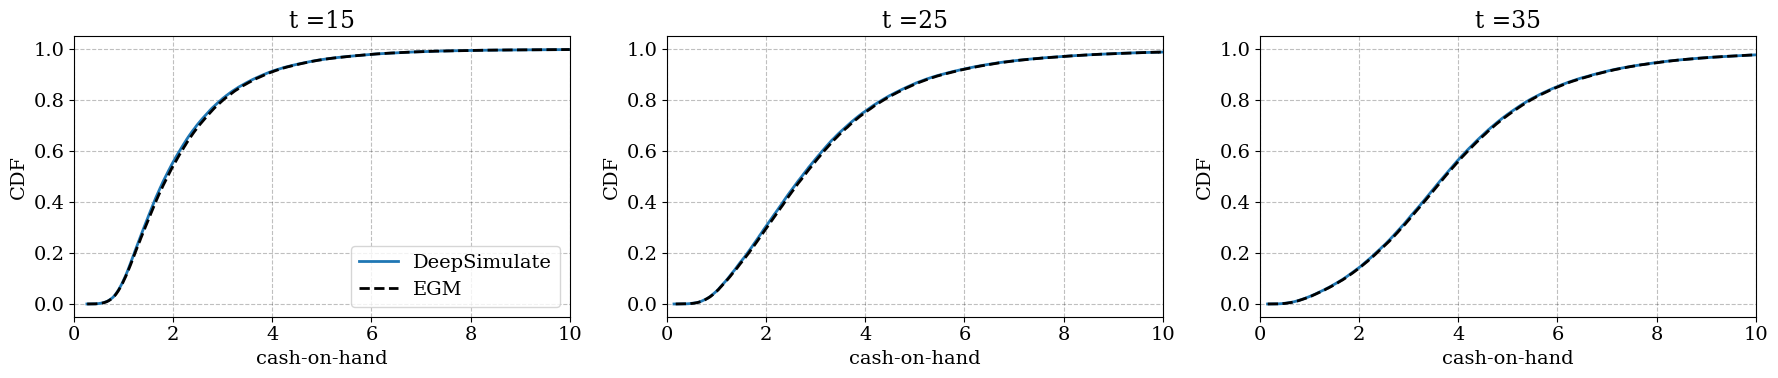

DeepFOC 3


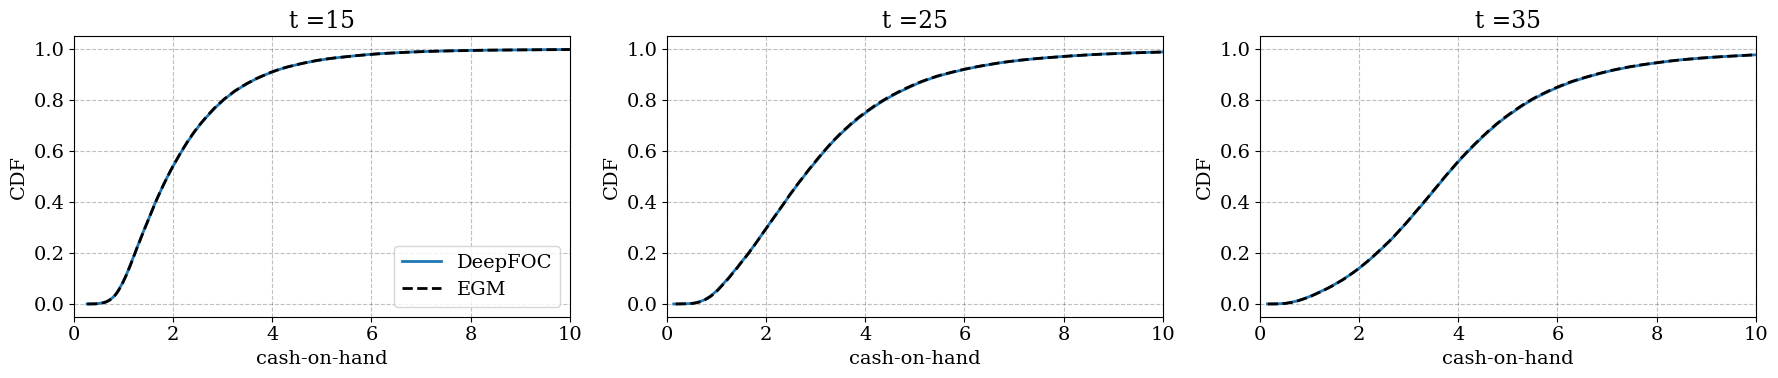

DeepVPD 3


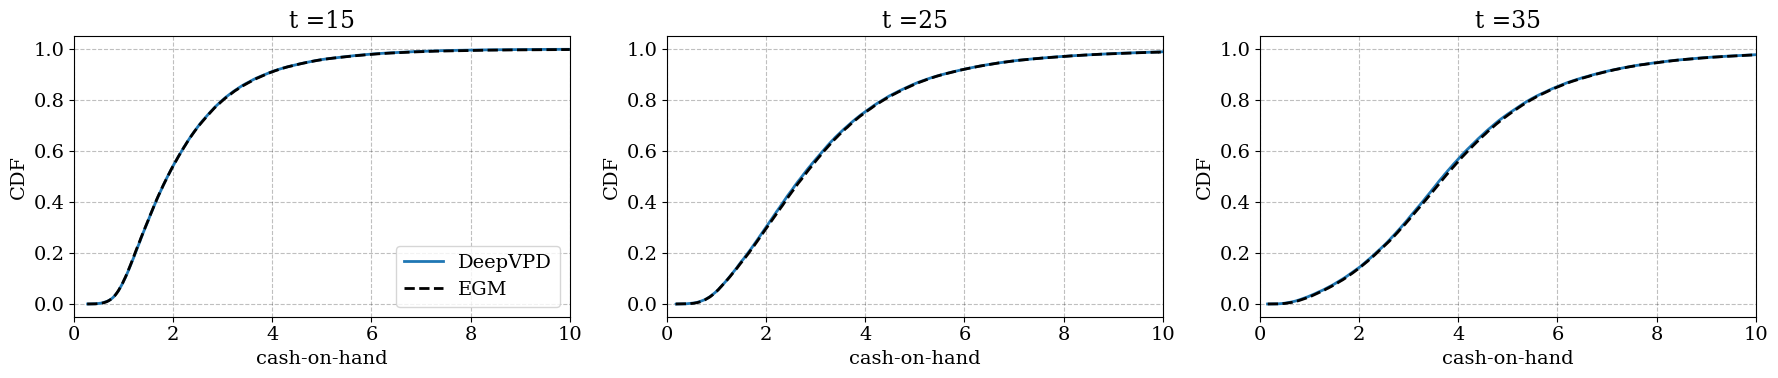

DeepVPD_NNs3FOC 3


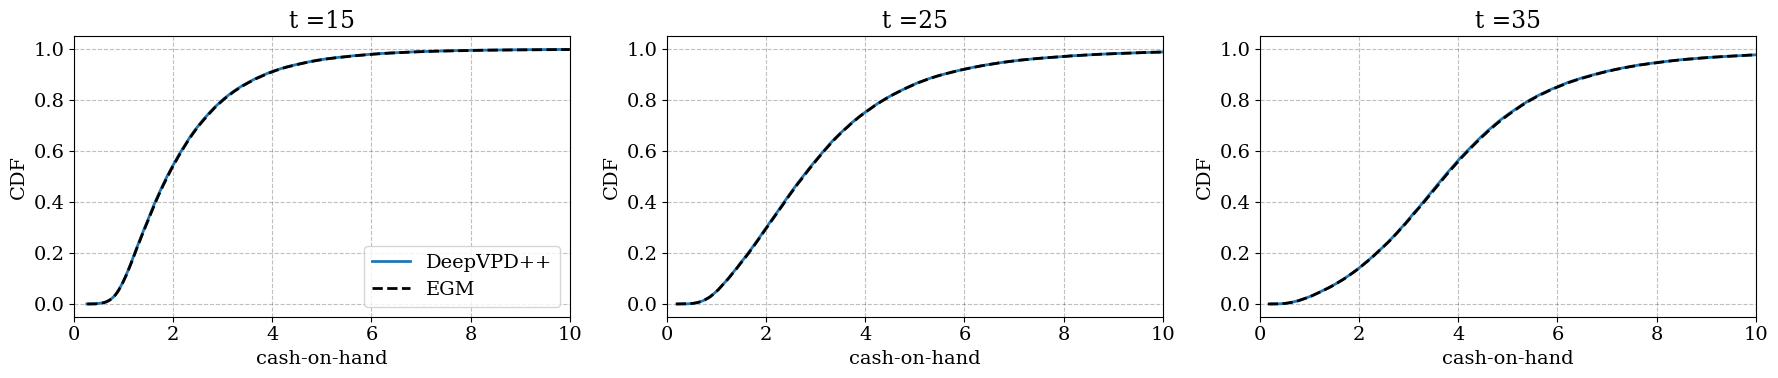

In [26]:
for D in Ds:
    for algoname in algonames + ['DeepVPD_NNs3FOC']:

        model = get_model(models,algoname,D)
        if model is None: continue
        label = algolabels[algoname]

        print(algoname,D)

        fig = plt.figure(figsize=(18,4))

        for i,t in enumerate([15,25,35]):
                
            ax = fig.add_subplot(1,3,1+i)

            x, y = CDF(model.sim.states[t,:,0])
    
            ax.plot(x,y,label=label,linewidth=2)           
                    
            x,y = CDF(models[('DP',f'{D}D')].sim.states[t,:,0])
        
            ax.plot(x,y,label=f'EGM',linewidth=2,color='black',linestyle='--')
        
            ax.set_xlim([0,m_max])
            ax.set_xlabel('cash-on-hand')
            ax.set_ylabel('CDF')
            if i ==0: ax.legend(loc='lower right')
            ax.set_title(f't ={t}')

        fig.tight_layout()
        filepath = f'{folder}/BufferStockModel_cdf_{D}D_{algoname}.svg'
        fig.savefig(filepath)   

        if do_display: 
            plt.show()
        else:
            plt.close(fig)
            display(HTML(f'<a href="{filepath}">{filepath}</a>'))
            

### 5.5. <a id='toc5_5_'></a>[Transfer](#toc0_)

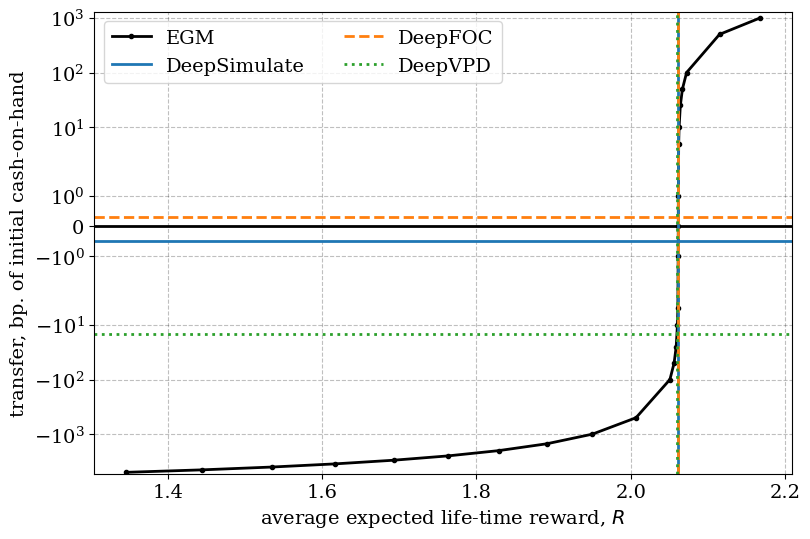

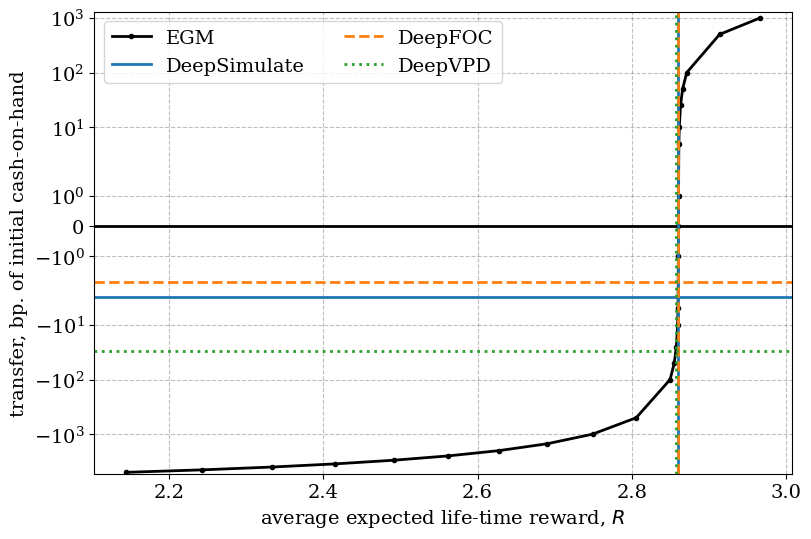

In [27]:
for D in Ds:
    transfer_plot('BufferStockModel',models,algonames,D,folder=folder)

## 6. <a id='toc6_'></a>[Speed-of-convergence](#toc0_)

In [28]:
xlim = [0.1,100]
xlim_low = [0.001,100]
ylim = [-1000,10]

0D


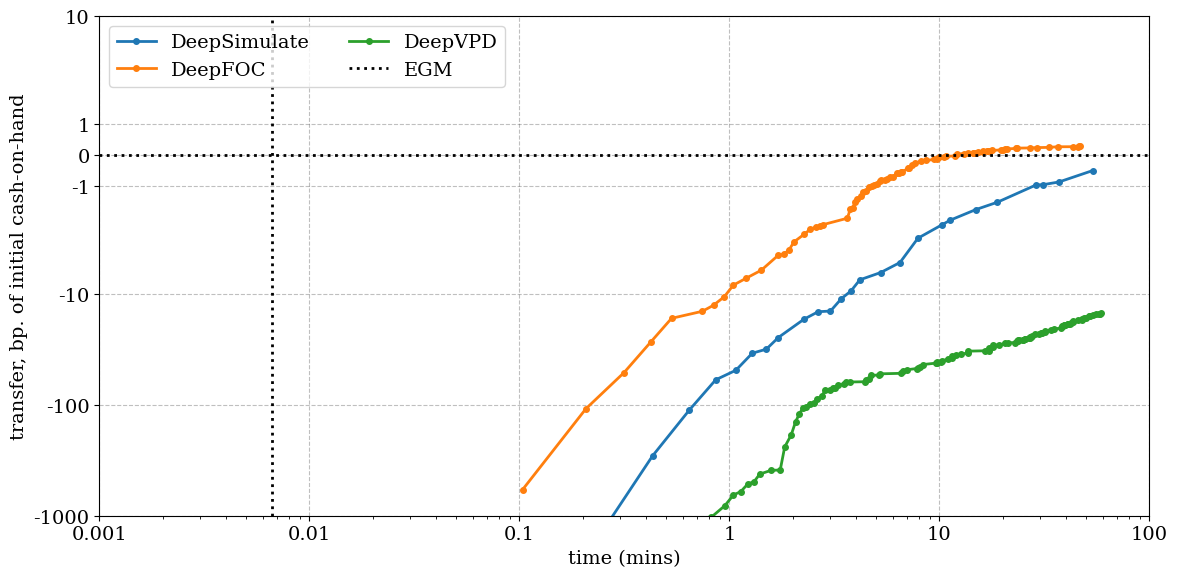

3D


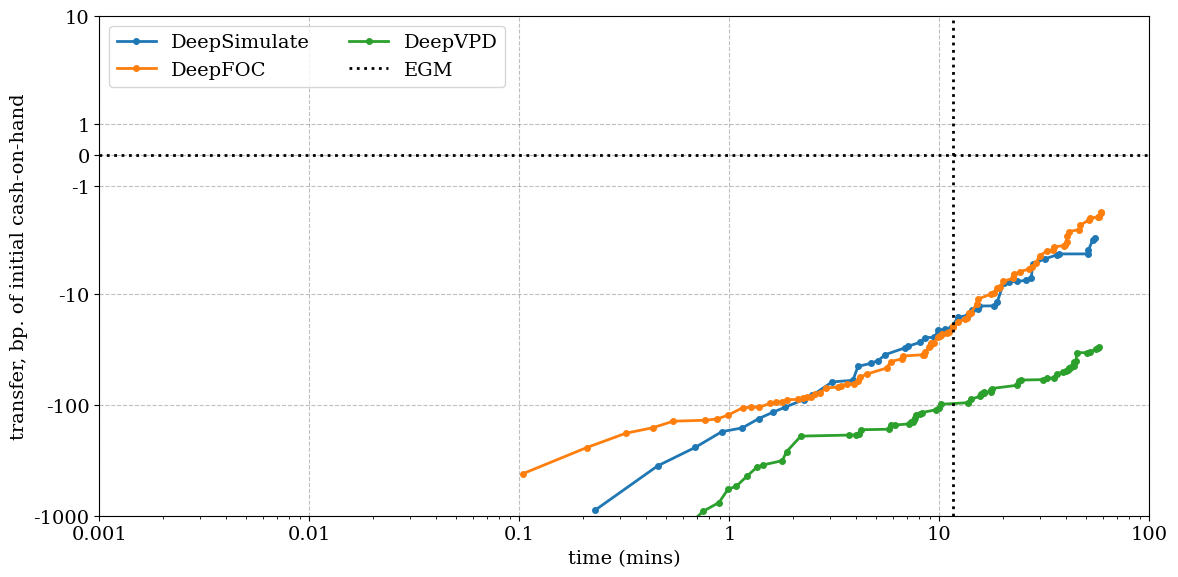

In [29]:
for D in Ds:
    
    Dstr = f'{D}D'
    print(Dstr)

    DP = models[('DP',Dstr)]
    specs = {(algoname,Dstr):algoname for algoname in algonames}

    convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                     xlim=xlim_low,ylim=ylim,
                     folder=folder,postfix=f'_{Dstr}')

Curse of dimensionality:

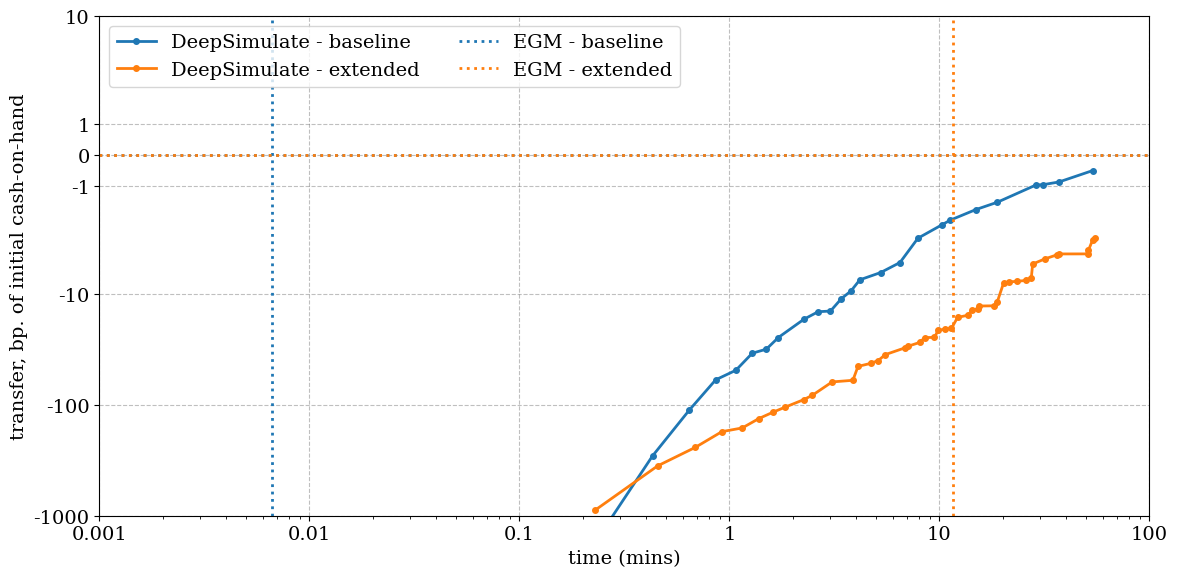

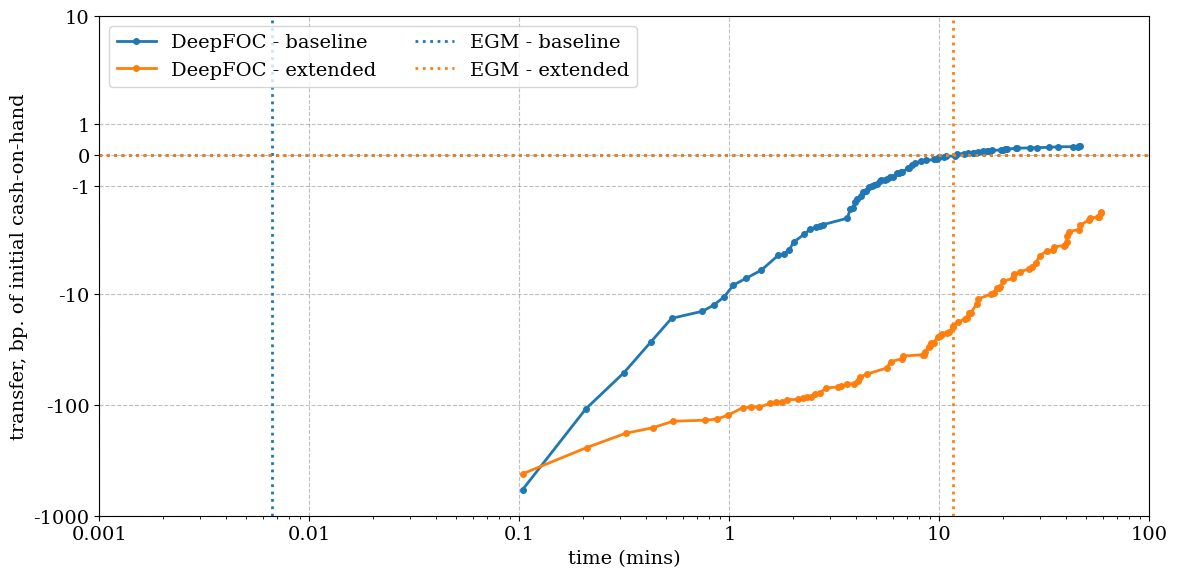

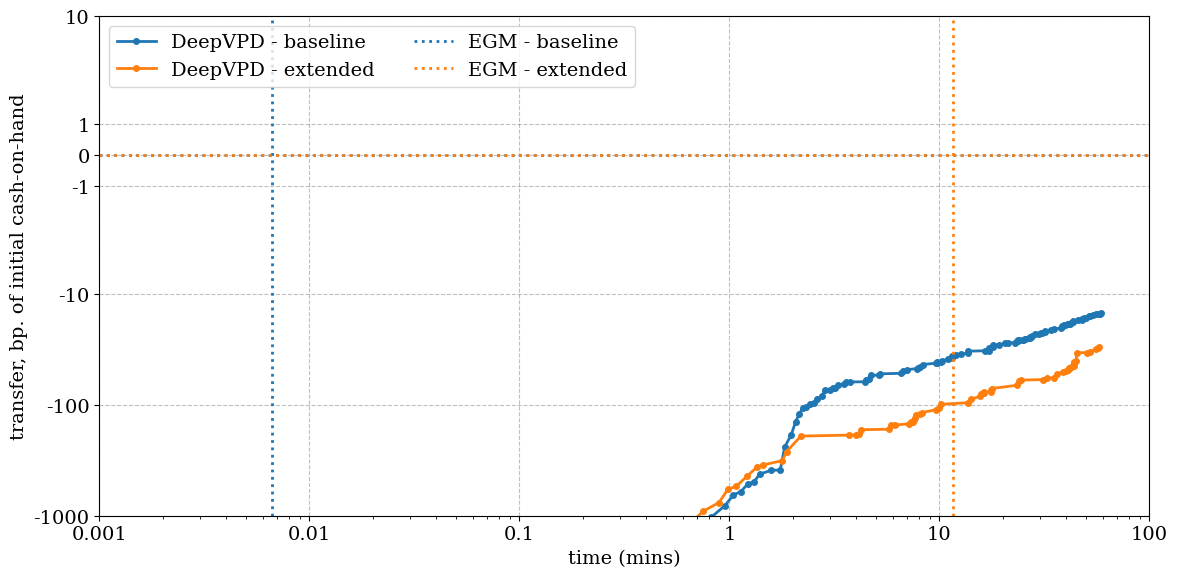

In [30]:
xlim_low = [0.001,100]
for algoname in algonames:
    
    DP = {
        ('DP',f'0D'):f'EGM - baseline',
        ('DP',f'3D'):f'EGM - extended',
    }

    specs = {
        (algoname,f'0D'):f'{algoname} - baseline',
        (algoname,f'3D'):f'{algoname} - extended',
    }

    convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                     xlim=xlim_low,ylim=ylim,
                     folder=folder,postfix=f'_{algoname}')  

    plt.show()  

### 6.1. <a id='toc6_1_'></a>[DeepV-PD++](#toc0_)

0D


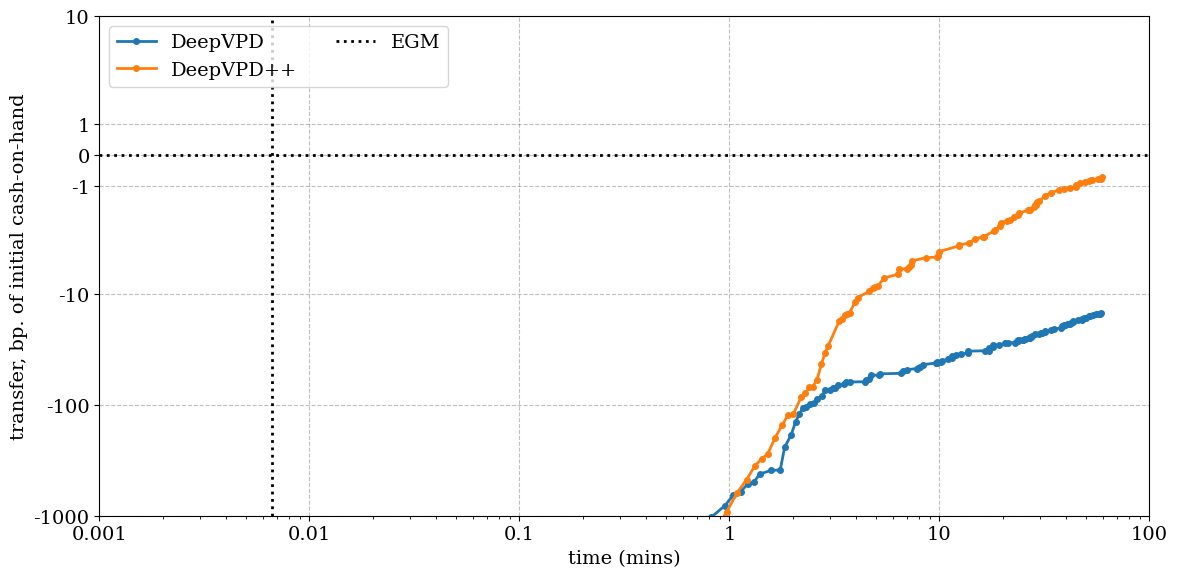

3D


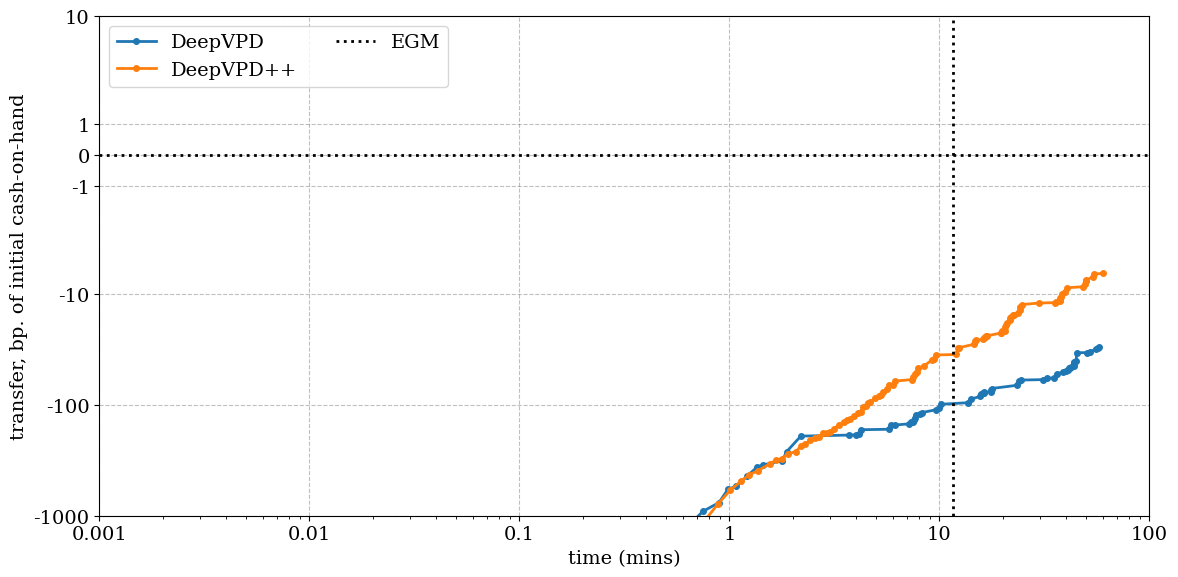

In [31]:
for D in Ds:
    
    Dstr = f'{D}D'
    print(Dstr)

    DP = models[('DP',Dstr)]
    specs = {}
    specs[(f'DeepVPD',Dstr)] = 'DeepVPD'
    specs[(f'DeepVPD',Dstr,'NNs3FOC')] = 'DeepVPD++'

    convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                     xlim=xlim_low,ylim=ylim,
                     folder=folder,postfix=f'_{Dstr}_DeepVPD_NNs3FOC')

0D


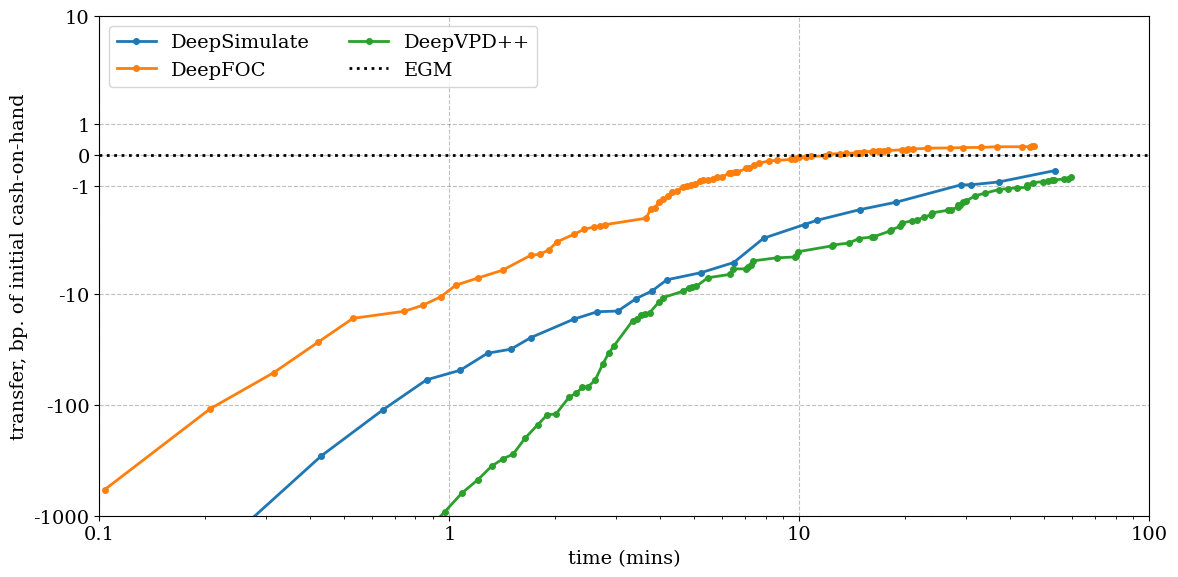

3D


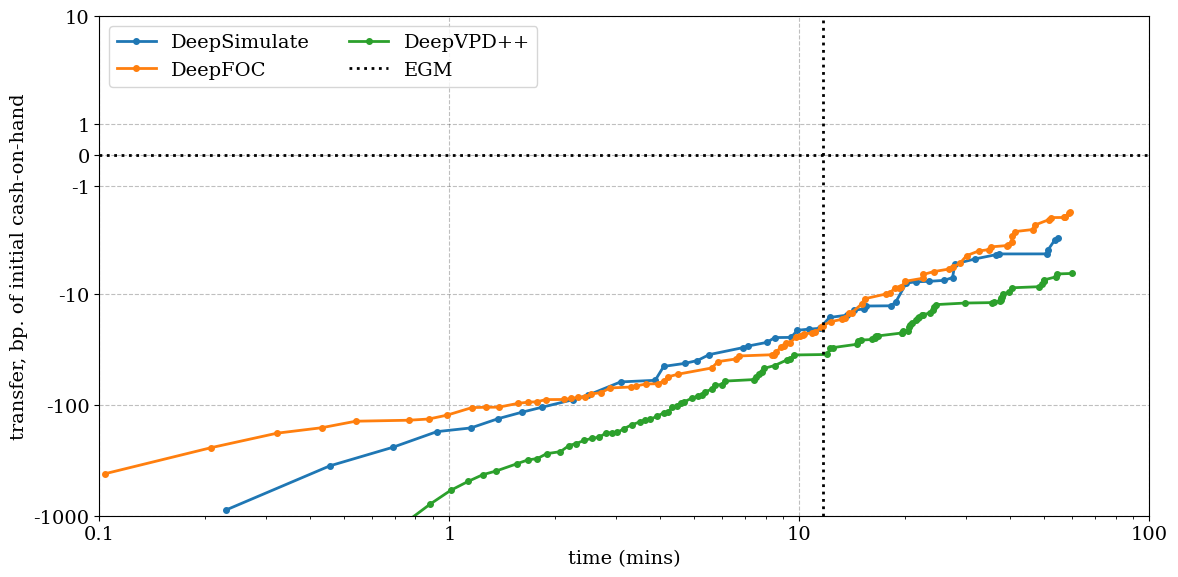

In [32]:
for D in Ds:
    
    Dstr = f'{D}D'
    print(Dstr)

    DP = models[('DP',Dstr)]
    specs = {
        (algoname,Dstr):algoname for algoname in algonames if not algoname == 'DeepVPD'
    }
    specs[(f'DeepVPD',Dstr,'NNs3FOC')] = 'DeepVPD++'

    convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                     xlim=xlim,ylim=ylim,
                     folder=folder,postfix=f'_{Dstr}_DeepVPD_NNs3FOC_all')

### 6.2. <a id='toc6_2_'></a>[DeepV and DeepQ](#toc0_)

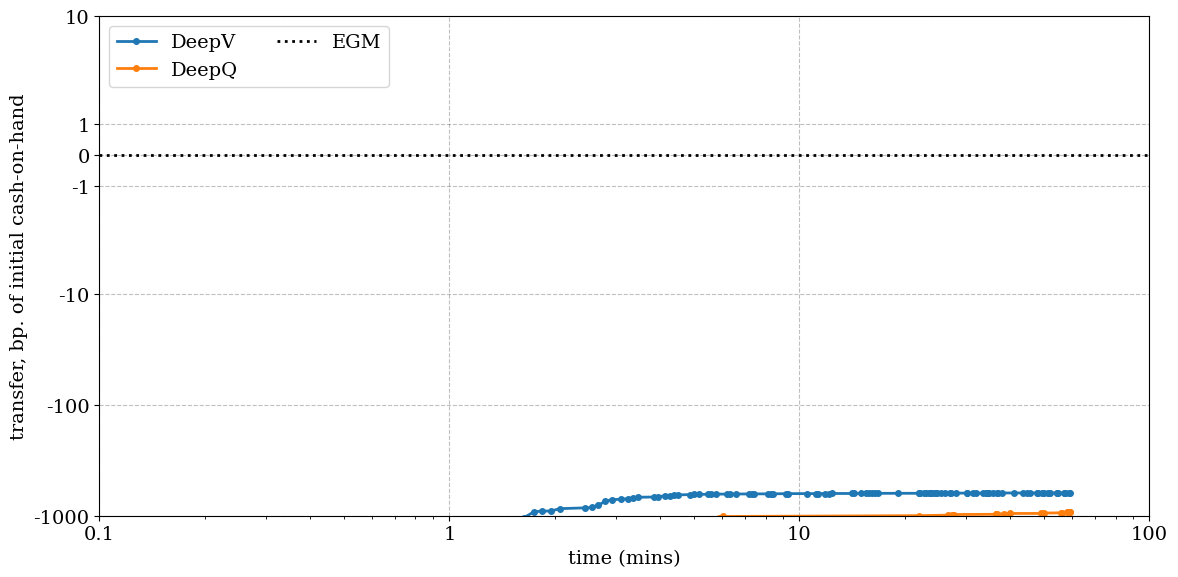

In [33]:
if full:
    for D in [0]:
        
        DP = models[('DP',f'{D}D')]
        specs = {(algoname,f'{D}D'):algoname for algoname in ['DeepV','DeepQ']}

        convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                        xlim=xlim,ylim=ylim,
                        folder=folder,postfix=f'_{D}D_DeepVQ')

### 6.3. <a id='toc6_3_'></a>[Exploration](#toc0_)

DeepFOC 0D


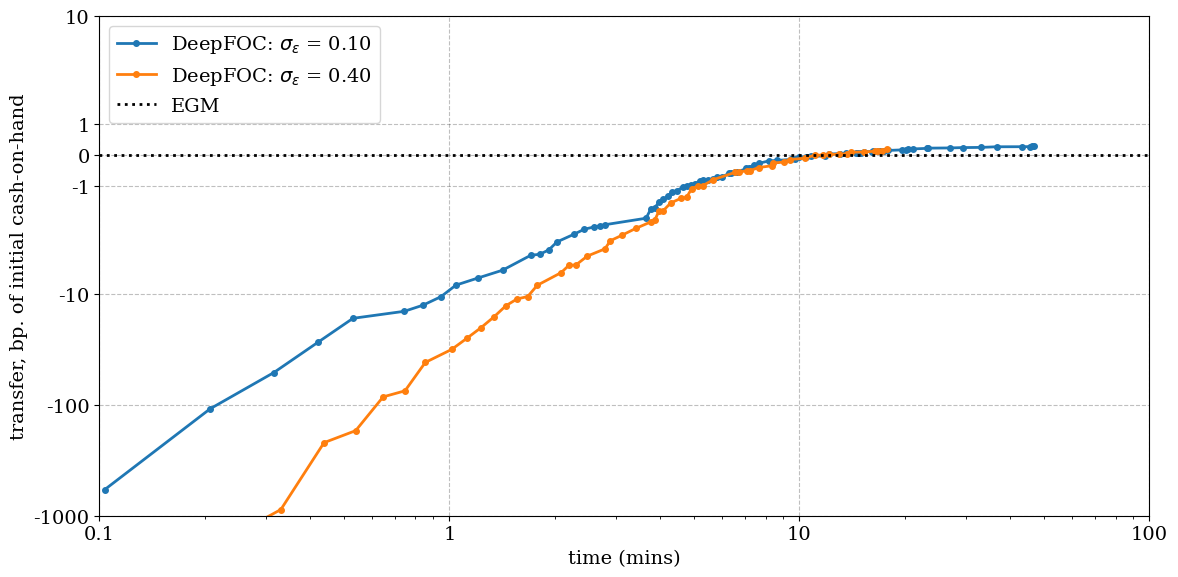

DeepVPD 0D


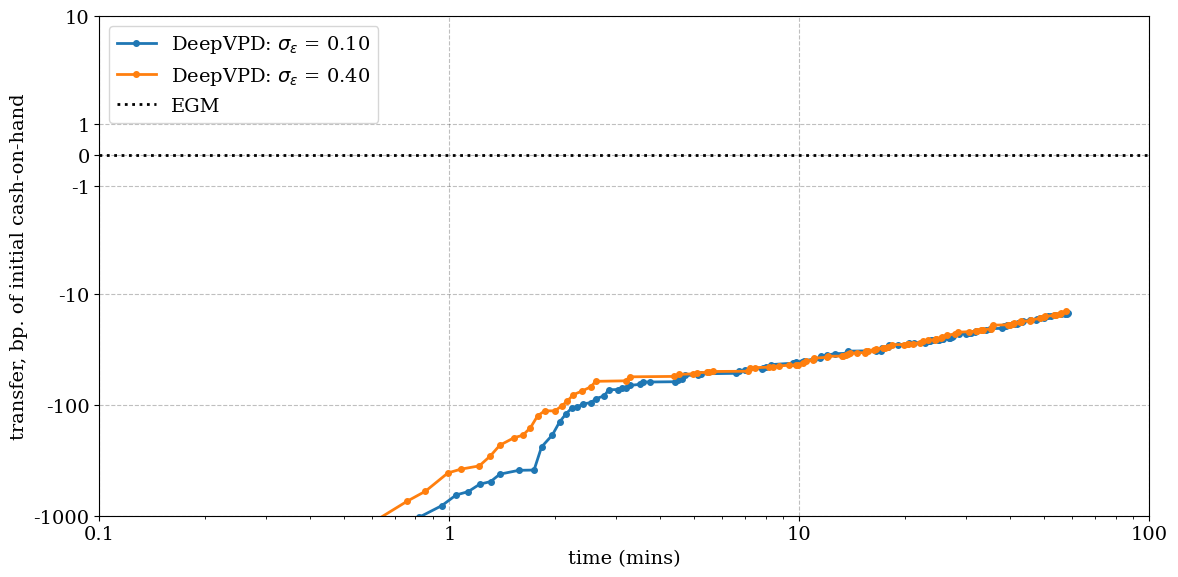

In [34]:
D = 0
algonames_ = ['DeepFOC','DeepVPD'] if full else ['DeepFOC']
for algoname in algonames_:

    Dstr = f'{D}D'
    print(algoname,Dstr)
 
    DP = models[('DP',Dstr)]
    specs = {
        (algoname,Dstr):f'{algoname}: $\\sigma_{{\\epsilon}}$ = {models[(algoname,Dstr)].train.epsilon_sigma[0]:.2f}',
        (algoname,Dstr,'moreexplore'):f'{algoname}: $\\sigma_{{\\epsilon}}$ = {models[(algoname,Dstr,"moreexplore")].train.epsilon_sigma[0]:.2f}',
    }

    
    convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                    xlim=xlim,ylim=ylim,legend_ncol=1,
                    folder=folder,postfix=f'_{algoname}_{Dstr}_exploration')
    plt.show()

### 6.4. <a id='toc6_4_'></a>[Number of neurons](#toc0_)

DeepVPD 0D
 500  280001 12062 
 250   77501 13362 0.28 1.11
 750  607501  9794 2.17 0.81


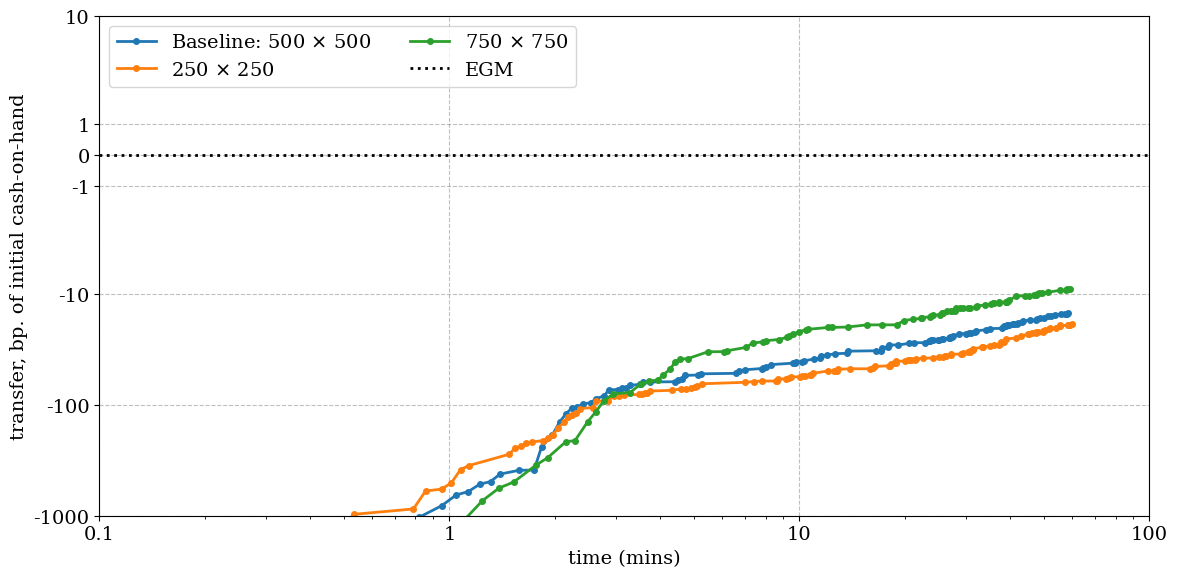

DeepVPD 3D
 500  281501 11252 
 250   78251 12274 0.28 1.09
 750  609751  9855 2.17 0.88


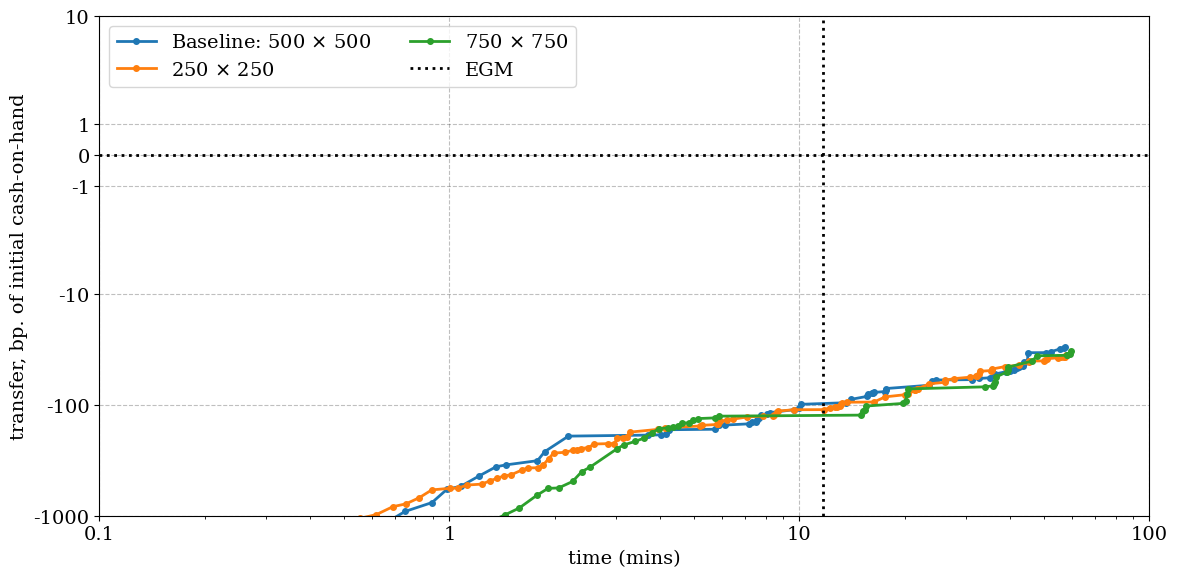

In [35]:
if full:
    for D in Ds:
        for algoname in ['DeepVPD']:

            Dstr = f'{D}D'
            print(algoname,Dstr)

            DP = models[('DP',Dstr)]
            specs = {
                (key:=(algoname,Dstr)):f'Baseline: {models[key].train.Nneurons_policy[0]} $\\times$ {models[key].train.Nneurons_policy[0]}',
                (key:=(algoname,Dstr,'Nneurons0')):f'{models[key].train.Nneurons_policy[0]} $\\times$ {models[key].train.Nneurons_policy[0]}',
                (key:=(algoname,Dstr,'Nneurons1')):f'{models[key].train.Nneurons_policy[0]} $\\times$ {models[key].train.Nneurons_policy[0]}',
            }
            
            for i,key in enumerate(specs.keys()):
                model = models[key]
                Nneurons = model.train.Nneurons_policy[0]
                Nparameters = np.sum([np.prod(v.size()) for k,v in model.policy_NN.items()])
                iter = model.info['iter']

                if i == 0:
                    print(f'{Nneurons:4d} {Nparameters:7d} {iter:5d} ')
                    base_Nparameters = Nparameters
                    base_iter = iter
                else:
                    print(f'{Nneurons:4d} {Nparameters:7d} {iter:5d} {Nparameters/base_Nparameters:.2f} {iter/base_iter:.2f}')

            convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                            xlim=xlim,ylim=ylim,
                            folder=folder,postfix=f'_{algoname}_{D}D_Nneurons')
            
            plt.show()

### 6.5. <a id='toc6_5_'></a>[FOC](#toc0_)

DeepVPD 0D


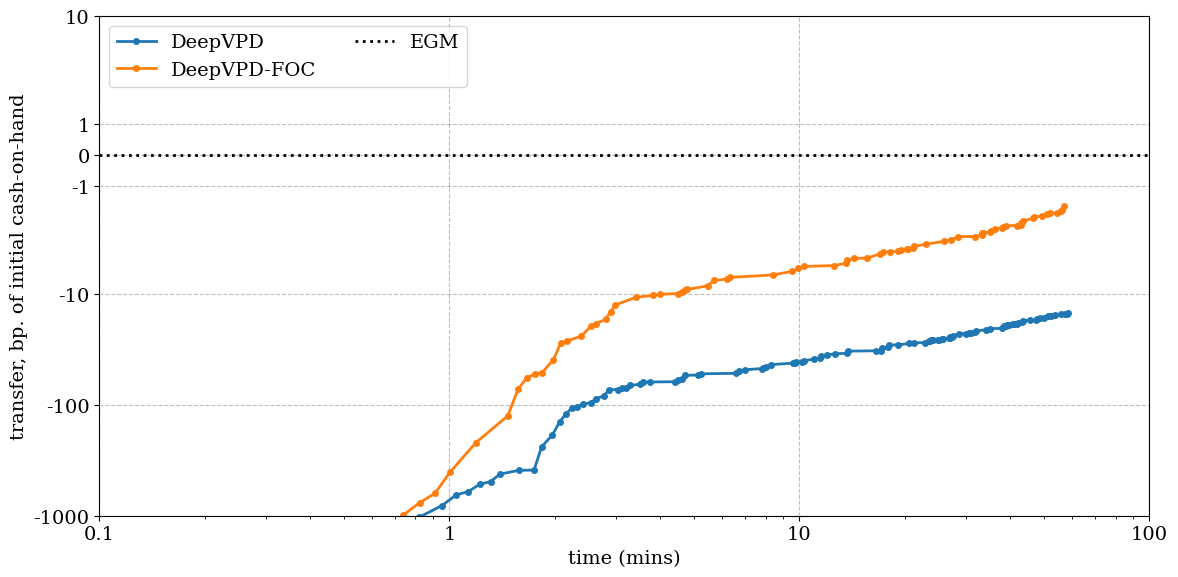

DeepVPD 3D


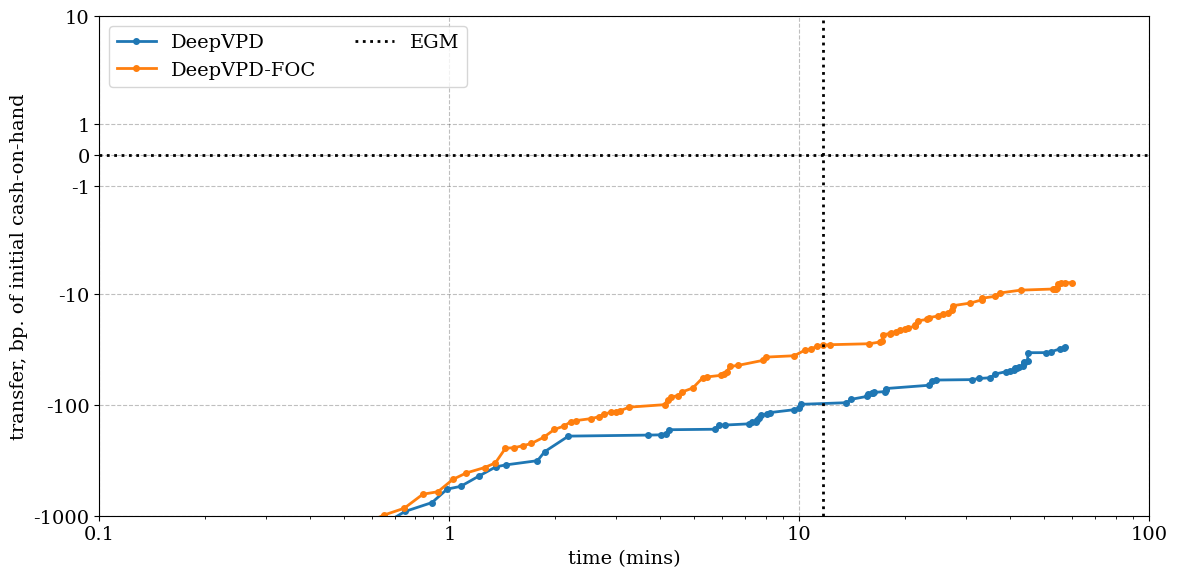

In [36]:
if full:
    for D in Ds:
        for algoname in ['DeepVPD']:

            Dstr = f'{D}D'
            print(algoname,Dstr)

            DP = models[('DP',Dstr)]
            specs = {
                (algoname,Dstr):'DeepVPD',
                (algoname,Dstr,'FOC'):'DeepVPD-FOC',
            }
            convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                            xlim=xlim,ylim=ylim,
                            folder=folder,postfix=f'_{algoname}_{Dstr}_FOC')

### 6.6. <a id='toc6_6_'></a>[Averaging](#toc0_)

DeepVPD 0D


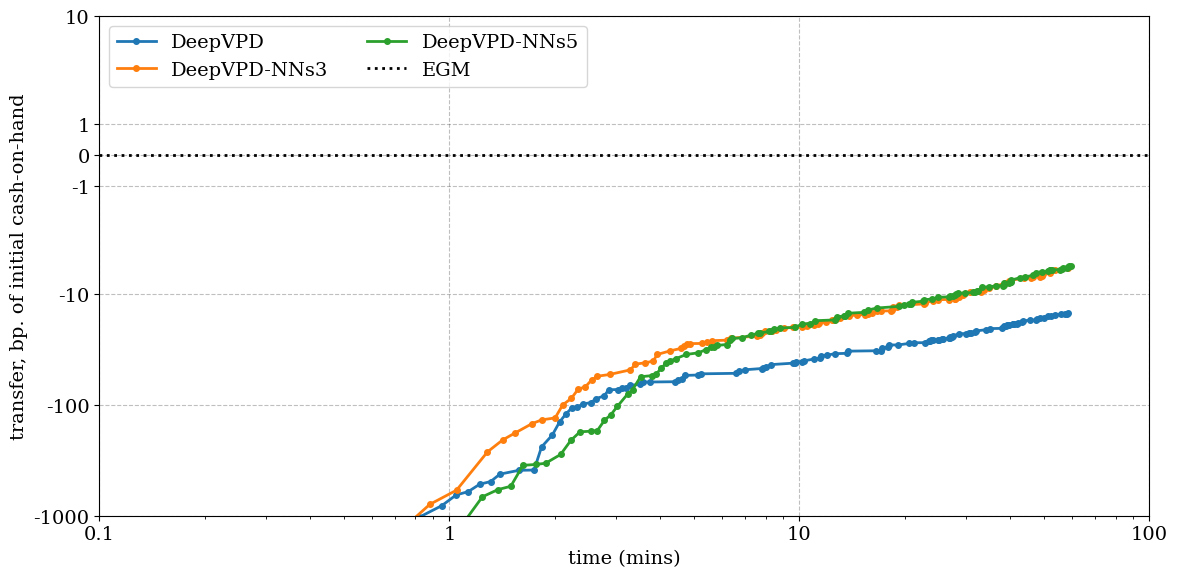

DeepVPD 3D


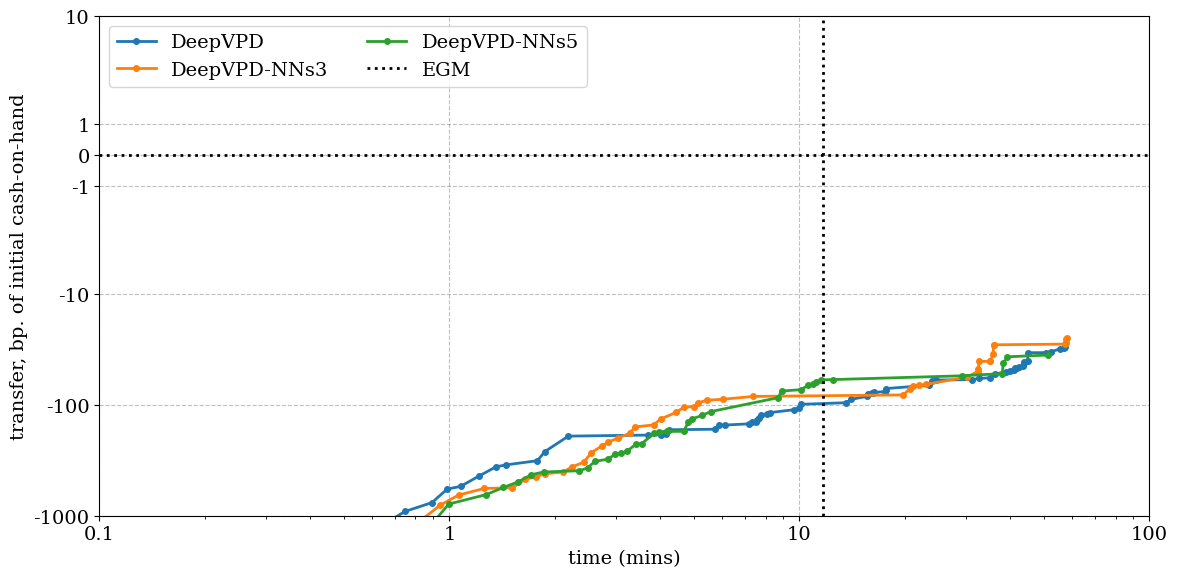

In [37]:
if full:
    for D in Ds:
        for algoname in ['DeepVPD']:

            Dstr = f'{D}D'
            print(algoname,Dstr)

            DP = models[('DP',Dstr)]
            specs = {
                (algoname,Dstr):'DeepVPD',
                (algoname,Dstr,'NNs3'):'DeepVPD-NNs3',
                (algoname,Dstr,'NNs5'):'DeepVPD-NNs5',
            }
            convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                            xlim=xlim,ylim=ylim,
                            folder=folder,postfix=f'_{algoname}_{Dstr}_NNs')

### 6.7. <a id='toc6_7_'></a>[Float 64](#toc0_)

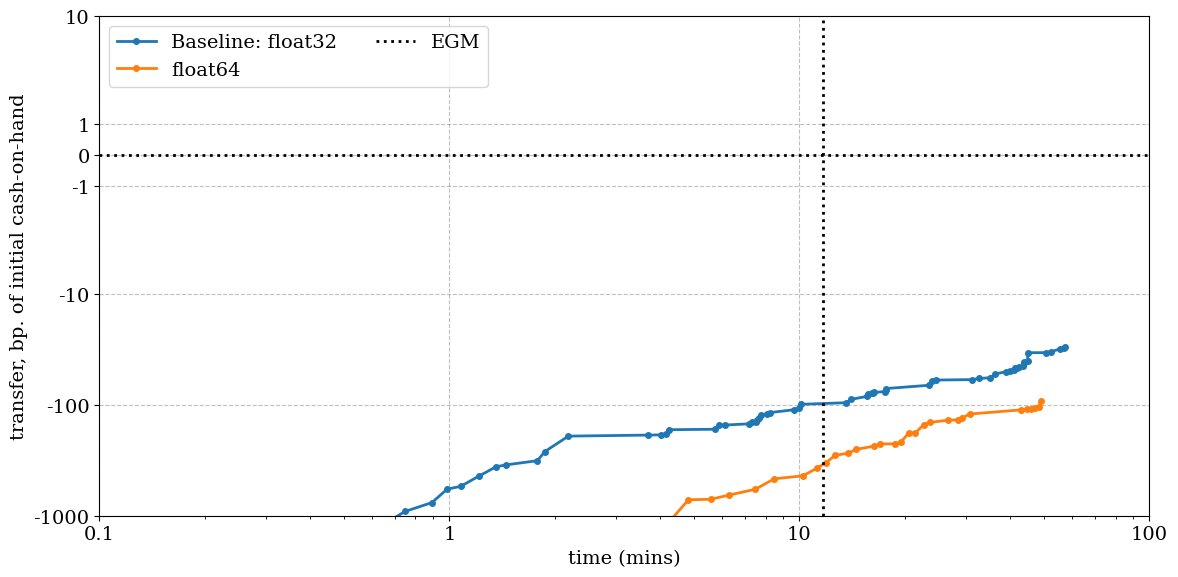

In [38]:
if full:
    D = 3
    for algoname in ['DeepVPD']:

        DP = models[('DP',f'{D}D')]
        specs = {
            (algoname,f'{D}D'):'Baseline: float32',
            (algoname,f'{D}D','float64'):'float64',
        }
        convergence_plot('BufferStockModel',models,specs,DP=DP,do_transfer=True,
                        xlim=xlim,ylim=ylim,
                        folder=folder,postfix=f'_{algoname}_{D}D_float64')

## 7. <a id='toc7_'></a>[Euler Errors](#toc4_2_)                   [&#8593;](#toc0_)

**Note:** Only while working.

In [39]:
from BufferStockModel import select_euler_errors
from BufferStockModelEGM import select_euler_errors_EGM

DP 0D: 0.0001 share of euler errors are zero
DeepSimulate 0D: 0.0000 share of euler errors are zero


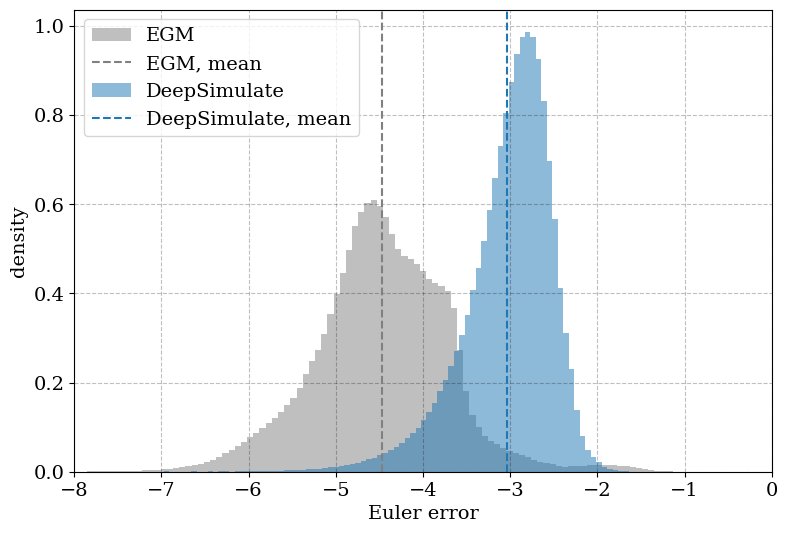

DeepFOC 0D: 0.0001 share of euler errors are zero


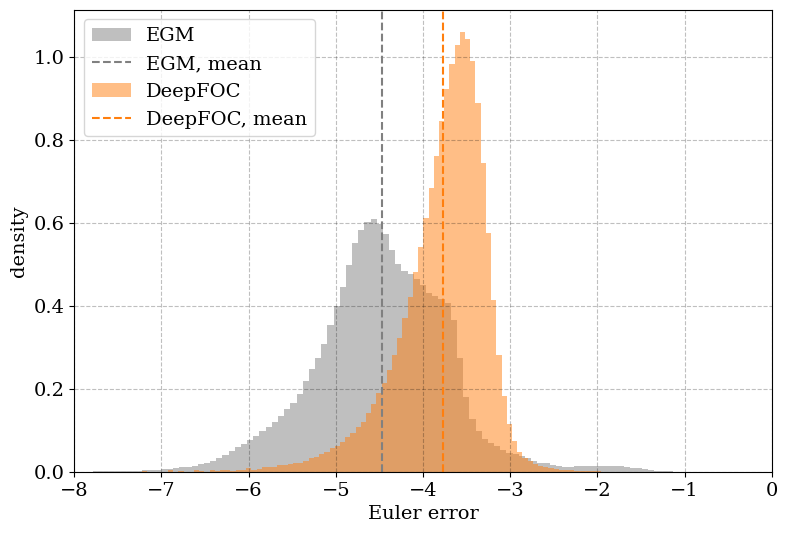

DeepVPD 0D: 0.0000 share of euler errors are zero


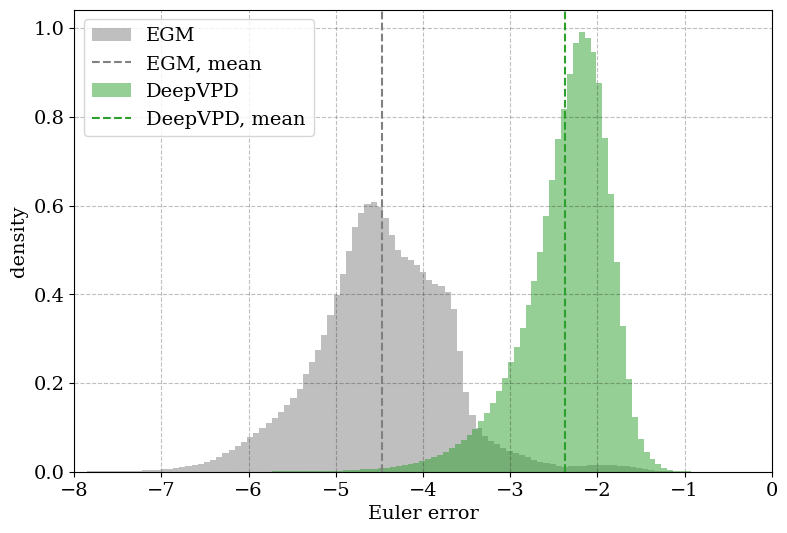

DeepVPD_NNs3FOC 0D: 0.0000 share of euler errors are zero


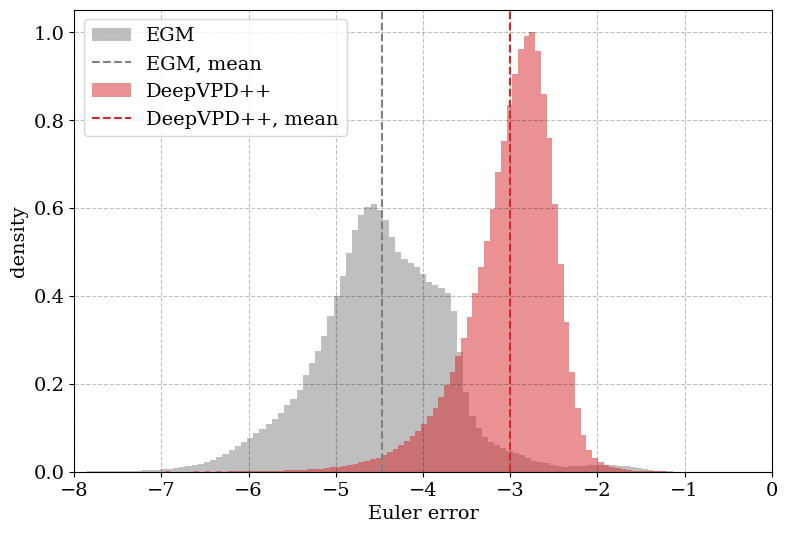

DP 3D: 0.0002 share of euler errors are zero
DeepSimulate 3D: 0.0000 share of euler errors are zero


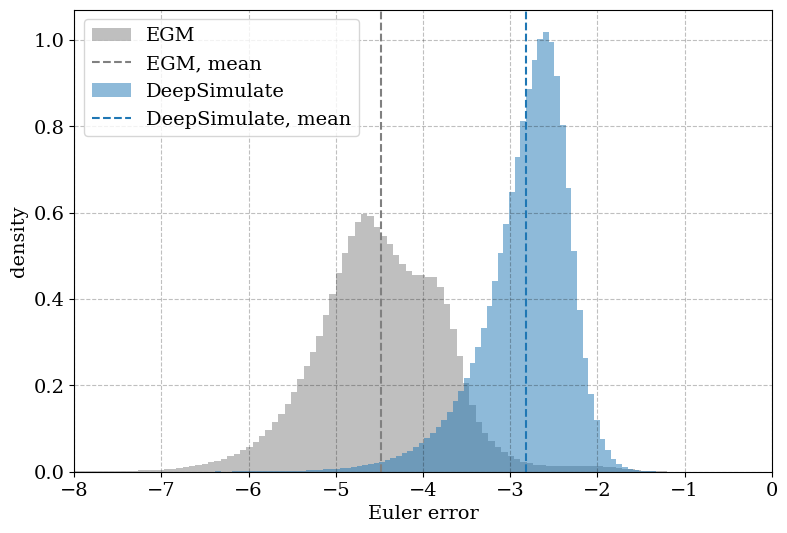

DeepFOC 3D: 0.0001 share of euler errors are zero


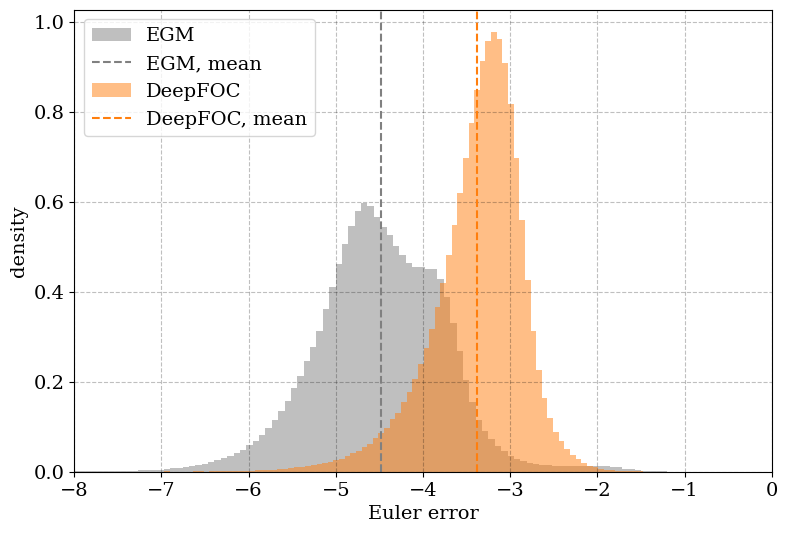

DeepVPD 3D: 0.0000 share of euler errors are zero


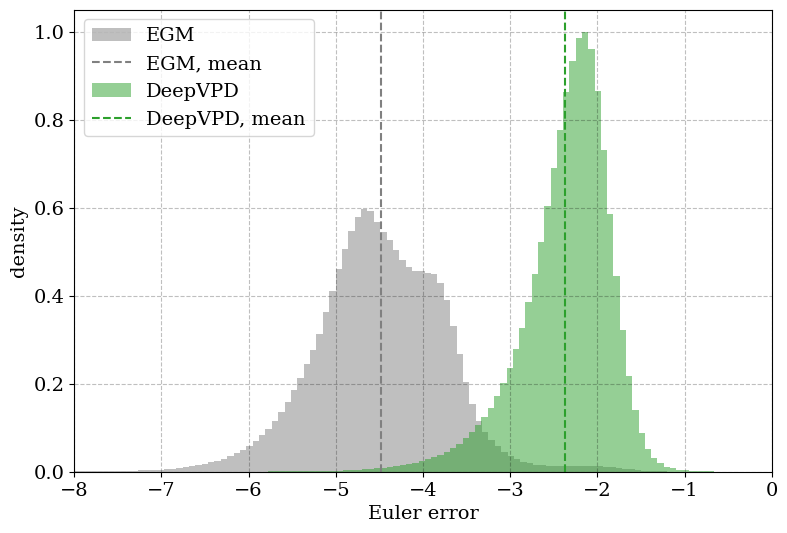

DeepVPD_NNs3FOC 3D: 0.0000 share of euler errors are zero


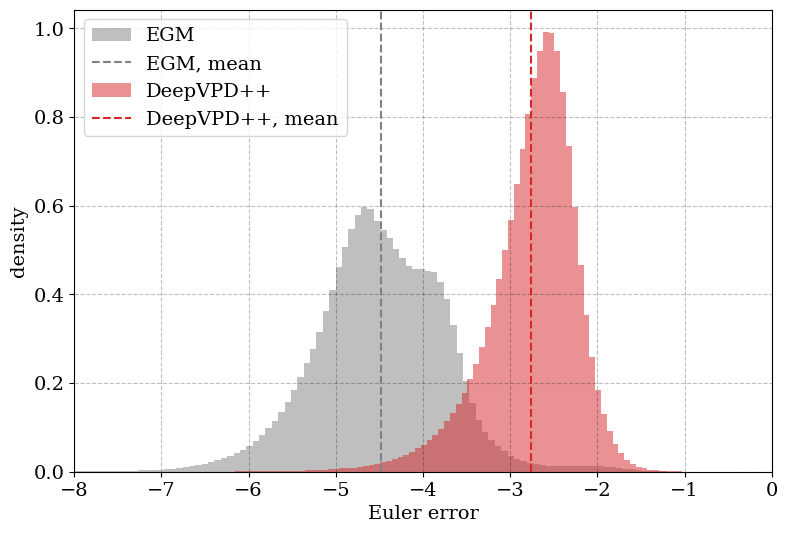

In [40]:
for D in Ds:

    # DP
    model_DP = models[(f'DP',f'{D}D')]
    euler_error_DP = select_euler_errors_EGM(model_DP)
    I = np.isclose(np.abs(euler_error_DP),0.0)
    model_DP.info['mean_euler_error'] = np.mean(np.log10(np.abs(euler_error_DP[~I])))
    print(f'DP {D}D: {np.mean(I):.4f} share of euler errors are zero')

    # DL and figure
    for i,algoname in enumerate(algonames + ['DeepVPD_NNs3FOC']):
        
        model = get_model(models,algoname,D)
        if model is None: continue
        label = algolabels[algoname]
         
        fig = plt.figure(figsize=(9,6))
        ax = fig.add_subplot(1,1,1)
        
        euler_error = select_euler_errors(model)
        J = np.isclose(np.abs(euler_error),0.0)
        print(f'{algoname} {D}D: {np.mean(J):.4f} share of euler errors are zero')

        model.info['mean_euler_error'] = np.mean(np.log10(np.abs(euler_error[~J])))

        ax.hist(np.log10(np.abs(euler_error_DP)[~I]),bins=100,alpha=0.5,color='grey',density=True,label='EGM')
        ax.axvline(x=model_DP.info['mean_euler_error'],color='grey',linestyle='--',label='EGM, mean')

        ax.hist(np.log10(np.abs(euler_error)[~J]),bins=100,alpha=0.5,color=colors[i],density=True,label=label)
        ax.axvline(x=model.info['mean_euler_error'],color=colors[i],linestyle='--',label=f'{label}, mean')

        ax.set_xlim([-8,0])
        ax.set_xlabel('Euler error')
        ax.set_ylabel('density')

        ax.legend(loc='upper left')

        filepath = f'{folder}/BufferStockModel_euler_error_{D}D_{algoname}.svg'
        fig.savefig(filepath)

        if do_display: 
            plt.show()
        else:
            plt.close(fig)
            display(HTML(f'<a href="{filepath}">{filepath}</a>'))


## 8. <a id='toc8_'></a>[Table](#toc0_)

In [41]:
def create_table(DP,models,labels,DP_name='EGM'):

    # define column and row titles
    columns = [DP_name] + labels
    
    rows = [
        'Life-time reward, $R$', 
        'Transfer (bp.)', 
        'Mean log10 Euler error',
        '',
        'Total time (m)', 
        '\,\,\,update NN', 
        '\,\,\,simulation: training sample', 
        '\,\,\,simulation: out-of-sample R', 
        'Iterations', 
        'Avg. policy epochs', 
        'Avg. value epochs',
        
    ]

    # create with NaN values
    df = pd.DataFrame(index=rows,columns=columns).fillna('-')  # using '-' to represent missing df for display purposes
    for col in columns:
        df.loc['',col] = ''

    # fill with values
    for model,label in zip([DP]+models,[DP_name]+labels):
       df.loc['Life-time reward, $R$',label] = f"{model.sim.R:.4f}"

    df.loc['Transfer (bp.)', DP_name] = 0
    for model,label in zip(models,labels):

        transfer = compute_transfer(DP.sim.R_transfer,DP.egm.transfer_grid,
                            model.sim.R)
        
        if not np.isnan(transfer):
            df.loc['Transfer (bp.)', label] = f"{100**2*transfer:.0f}"
        else:
            df.loc['Transfer (bp.)', label] = '-'

    for model,label in zip([DP]+models,[DP_name]+labels):
        df.loc['Mean log10 Euler error',label] = f"{model.info['mean_euler_error']:.1f}"

    for model,label in zip([DP]+models,[DP_name]+labels):
        df.loc['Total time (m)', label] = f"{model.info['time']/60:.2f}"

    df.loc['\,\,\,update NN',DP_name] = '-'
    for model,label in zip(models,labels):
        time_rel = model.info['time.update_NN'] / model.info['time']
        df.loc['\,\,\,update NN', label] = f"{100*time_rel:.1f}\%"

    df.loc['\,\,\,simulation: training sample',DP_name] = '-'
    for model,label in zip(models,labels):
        time_rel = model.info['time._simulate_training_sample'] / model.info['time']
        df.loc['\,\,\,simulation: training sample', label] = f"{100*time_rel:.1f}\%"

    df.loc['\,\,\,simulation: out-of-sample R',DP_name] = '-'
    for model,label in zip(models,labels):
        time_rel = model.info['time.simulate_R'] / model.info['time']
        df.loc['\,\,\,simulation: out-of-sample R', label] = f"{100*time_rel:.1f}\%"

    df.loc['Iterations', DP_name] = 1
    for model,label in zip(models,labels):
        df.loc['Iterations', label] = model.info['iter']

    df.loc['Avg. policy epochs', DP_name] = '-'
    for model,label in zip(models,labels):
        df.loc['Avg. policy epochs', label] = f"{model.info[('policy_epochs','mean')]:.1f}"

    df.loc['Avg. value epochs', DP_name] = '-'
    for model,label in zip(models,labels):
        df.loc['Avg. value epochs', label] = f"{model.info[('value_epochs','mean')]:.1f}"

    return df

In [42]:
for D in Ds:

    print(f'{D = }')

    # a. select
    DP = models[('DP',f'{D}D')]
    algonames_ = algonames + ['DeepVPD_NNs3FOC']
    models_ = [get_model(models,algoname,D) for algoname in algonames_]
    labels = [algolabels[algoname] for algoname in algonames_]

    # b. table
    df = create_table(DP,models_,labels)
    display(df)

    # c. save
    filename = f'{folder}/BufferStockModel_table_{D}D.tex'
    df.style.to_latex(filename,hrules=True)    

D = 0


EGM DeepSimulate DeepFOC DeepVPD  \
Life-time reward, $R$              2.0616       2.0616  2.0617  2.0600   
Transfer (bp.)                          0           -1       0     -15   
Mean log10 Euler error               -4.5         -3.0    -3.8    -2.4   
                                                                         
Total time (m)                       0.01        60.01   60.01   60.01   
\,\,\,update NN                         -       93.1\%  75.3\%  71.7\%   
\,\,\,simulation: training sample       -        2.3\%   8.2\%  10.1\%   
\,\,\,simulation: out-of-sample R       -        2.3\%   7.2\%   9.1\%   
Iterations                              1        17118   10050   12062   
Avg. policy epochs                      -          1.0    10.1    15.0   
Avg. value epochs                       -          0.0     0.0    19.8   

                                  DeepVPD++  
Life-time reward, $R$                2.0616  
Transfer (bp.)                           -1  
Mean log10 Euler error                 -3.0  
                                             
Total time (m)                        60.01  
\,\,\,update NN                      79.9\%  
\,\,\,simulation: training sample     6.2\%  
\,\,\,simulation: out-of-sample R     6.8\%  
Iterations                             9128  
Avg. policy epochs                     14.5  
Avg. value epochs                      53.0

D = 3


EGM DeepSimulate DeepFOC DeepVPD  \
Life-time reward, $R$              2.8601       2.8598  2.8599  2.8569   
Transfer (bp.)                          0           -3      -2     -30   
Mean log10 Euler error               -4.5         -2.8    -3.4    -2.4   
                                                                         
Total time (m)                      11.66        60.01   60.01   60.01   
\,\,\,update NN                         -       92.4\%  80.6\%  74.2\%   
\,\,\,simulation: training sample       -        1.9\%   6.0\%   8.8\%   
\,\,\,simulation: out-of-sample R       -        2.8\%   6.5\%   6.4\%   
Iterations                              1        15756    8872   11252   
Avg. policy epochs                      -          1.0    13.8    15.0   
Avg. value epochs                       -          0.0     0.0    32.1   

                                  DeepVPD++  
Life-time reward, $R$                2.8594  
Transfer (bp.)                           -7  
Mean log10 Euler error                 -2.8  
                                             
Total time (m)                        60.03  
\,\,\,update NN                      82.4\%  
\,\,\,simulation: training sample     4.8\%  
\,\,\,simulation: out-of-sample R     6.4\%  
Iterations                             7431  
Avg. policy epochs                     14.3  
Avg. value epochs                      96.6

### 8.1. <a id='toc8_1_'></a>[More on DeepVPD](#toc0_)

In [43]:
for D in Ds:

    print(f'{D = }')

    # a. select
    DP = models[('DP',f'{D}D')]

    if full:

        models_ = [models[('DeepVPD',f'{D}D')],
                models[('DeepVPD',f'{D}D','NNs3')],
                models[('DeepVPD',f'{D}D','FOC')],
                models[('DeepVPD',f'{D}D','NNs3FOC')],
        ]

        labels = ['Baseline',
                '+NNs3',
                '+FOC',
                '+FOC+NNs3',
        ]
    
    else:

        models_ = [
            models[('DeepVPD',f'{D}D')],
            models[('DeepVPD',f'{D}D','NNs3FOC')],
        ]

        labels = [
            'Baseline',
            '+FOC+NNs3',
        ]    

    # b. Euler erros
    for model,label in zip(models_,labels):
        euler_error = select_euler_errors(model)
        J = np.isclose(np.abs(euler_error),0.0)
        print(f'{label}: {np.mean(J):.4f} of euler errors are zero')
        model.info['mean_euler_error'] = np.mean(np.log10(np.abs(euler_error[~J])))        

    # c. table
    df = create_table(DP,models_,labels)
    display(df)

    # d. save
    filename = f'{folder}/BufferStockModel_table_DeepVPD_{D}D.tex'
    df.style.to_latex(filename,hrules=True) 

D = 0
Baseline: 0.0000 of euler errors are zero
+NNs3: 0.0000 of euler errors are zero
+FOC: 0.0000 of euler errors are zero
+FOC+NNs3: 0.0000 of euler errors are zero


EGM Baseline   +NNs3    +FOC +FOC+NNs3
Life-time reward, $R$              2.0616   2.0600  2.0610  2.0615    2.0616
Transfer (bp.)                          0      -15      -6      -2        -1
Mean log10 Euler error               -4.5     -2.4    -2.6    -2.8      -3.0
                                                                            
Total time (m)                       0.01    60.01   60.01   60.01     60.01
\,\,\,update NN                         -   71.7\%  79.5\%  74.3\%    79.9\%
\,\,\,simulation: training sample       -   10.1\%   6.3\%   9.6\%     6.2\%
\,\,\,simulation: out-of-sample R       -    9.1\%   7.3\%   7.6\%     6.8\%
Iterations                              1    12062    9222   12079      9128
Avg. policy epochs                      -     15.0    14.8    14.7      14.5
Avg. value epochs                       -     19.8    58.0    18.0      53.0

D = 3
Baseline: 0.0000 of euler errors are zero
+NNs3: 0.0000 of euler errors are zero
+FOC: 0.0000 of euler errors are zero
+FOC+NNs3: 0.0000 of euler errors are zero


EGM Baseline   +NNs3    +FOC +FOC+NNs3
Life-time reward, $R$              2.8601   2.8569  2.8575  2.8593    2.8594
Transfer (bp.)                          0      -30     -25      -8        -7
Mean log10 Euler error               -4.5     -2.4    -2.5    -2.6      -2.8
                                                                            
Total time (m)                      11.66    60.01   60.01   60.01     60.03
\,\,\,update NN                         -   74.2\%  84.8\%  77.4\%    82.4\%
\,\,\,simulation: training sample       -    8.8\%   5.3\%   7.9\%     4.8\%
\,\,\,simulation: out-of-sample R       -    6.4\%   4.7\%   6.9\%     6.4\%
Iterations                              1    11252    8064   11203      7431
Avg. policy epochs                      -     15.0    15.0    14.8      14.3
Avg. value epochs                       -     32.1    92.7    32.9      96.6